In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import os
import sys
import scipy.stats
def ReadTable(Infile):return pd.read_table(Infile,sep='\t',index_col=0)
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import scipy.stats
import matplotlib as mpl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from compiler.ast import flatten
from sklearn.neighbors import NearestNeighbors
from itertools import groupby
import math
import networkx as nx
import gc
import psutil
import scipy.stats
from scipy.stats.mstats import gmean
from scipy.cluster.hierarchy import linkage
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr
#import community
import matplotlib.gridspec as gridspec
import random
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
from pylab import savefig
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import scipy.stats as stats
import random
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
from pylab import savefig
from scipy.stats import chi2_contingency
import scipy.stats as stats


#Define f(x)
def ReadTable(Infile):return pd.read_table(Infile,sep='\t',index_col=0)
def ReadTableBed(Infile):return pd.read_table(Infile,sep='\t',header=None)
def Mkdir(DirX):
    if not os.path.exists(DirX):
        os.mkdir(DirX)

def meanCenter(L):
    m=np.mean(L)
    return [i-m for i in L]

def log10(L):return -math.log(L,10)


#计算FDR
def p_adjust_bh(p):
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]

import matplotlib
colorslist = ['#002299','white','#CC3300']
cmaps = matplotlib.colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=800)

In [24]:
Tf='./luad_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem.txt'
Tumor=ReadTable(Tf)

Tumor = Tumor.loc[~Tumor.index.duplicated(keep='first')]
Tumor=Tumor.drop('Entrez_Gene_Id', axis=1)
Tumor=Tumor.iloc[1: , : ]
Tumor.head()


TCGA-05-4244-01  TCGA-05-4249-01  TCGA-05-4250-01  \
Hugo_Symbol                                                      
UBE2Q2P2             11.2820          12.4436           6.0184   
HMGB1P1              49.5994          90.5117          49.5366   
RNU12-2P              1.0472           1.6098           0.0000   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 0.0000           0.0000           0.0000   

             TCGA-05-4382-01  TCGA-05-4384-01  TCGA-05-4389-01  \
Hugo_Symbol                                                      
UBE2Q2P2              7.5740           3.4942          13.7852   
HMGB1P1              82.8303          72.5351          66.3658   
RNU12-2P              0.4786           0.6109           0.3356   
SSX9P                 0.2393           0.0000           0.0000   
EZHIP                 7.6577           0.0000           0.0000   

             TCGA-05-4390-01  TCGA-05-4395-01  TCGA-05-4396-01  \
Hugo_Symbol                                                      
UBE2Q2P2              7.5810          12.1335          16.0273   
HMGB1P1             109.1810          57.0596         108.4150   
RNU12-2P              1.2773           0.5369           0.7582   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 0.0000           0.0000           0.0000   

             TCGA-05-4397-01  ...  TCGA-NJ-A4YG-01  TCGA-NJ-A4YI-01  \
Hugo_Symbol                   ...                                     
UBE2Q2P2             10.4318  ...          11.9573           9.7617   
HMGB1P1              84.2496  ...         163.5740         130.7490   
RNU12-2P              0.8835  ...           0.0000           0.0000   
SSX9P                 0.0000  ...           0.0000           0.0000   
EZHIP                 1.3252  ...           0.5774           1.3427   

             TCGA-NJ-A4YP-01  TCGA-NJ-A4YQ-01  TCGA-NJ-A55A-01  \
Hugo_Symbol                                                      
UBE2Q2P2              8.3410           7.5330          17.2393   
HMGB1P1             101.7400          82.4231         100.4200   
RNU12-2P              0.0000           0.6277           0.8742   
SSX9P                 0.0000           1.8832           0.0000   
EZHIP                 1.0163           0.0000           2.6226   

             TCGA-NJ-A55O-01  TCGA-NJ-A55R-01  TCGA-NJ-A7XG-01  \
Hugo_Symbol                                                      
UBE2Q2P2             22.9872          10.3226          81.1128   
HMGB1P1             100.1870          74.7210          85.3715   
RNU12-2P              1.1669           0.7209           0.0000   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 0.0000           1.9223           0.0000   

             TCGA-O1-A52J-01  TCGA-S2-AA1A-01  
Hugo_Symbol                                    
UBE2Q2P2             24.1914           8.9500  
HMGB1P1              61.1388          76.9265  
RNU12-2P              2.8708           0.6552  
SSX9P                 0.0000           0.0000  
EZHIP                 3.3493           2.6208  

[5 rows x 510 columns]

In [25]:
Nf='./luad_tcga_pan_can_atlas_2018/normals/data_mrna_seq_v2_rsem_normal_samples.txt'
Normal=ReadTable(Nf)
Normal = Normal.loc[~Normal.index.duplicated(keep='first')]
Normal=Normal.drop('Entrez_Gene_Id', axis=1)
Normal=Normal.iloc[1: , : ]

Normal.head()


TCGA-38-4625-11  TCGA-38-4626-11  TCGA-38-4627-11  \
Hugo_Symbol                                                      
UBE2Q2P2             10.9554           9.1110           7.5432   
HMGB1P1             128.3180         129.6160         144.8020   
RNU12-2P              0.0000           0.0000           0.0000   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 0.0000           1.8244           0.5388   

             TCGA-38-4632-11  TCGA-44-2655-11  TCGA-44-2657-11  \
Hugo_Symbol                                                      
UBE2Q2P2              9.0772           8.2126           5.9363   
HMGB1P1             108.5800         107.5160         153.8300   
RNU12-2P              0.0000           0.0000           0.0000   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 1.9272           1.2327           2.2766   

             TCGA-44-2661-11  TCGA-44-2662-11  TCGA-44-2665-11  \
Hugo_Symbol                                                      
UBE2Q2P2              6.8654           3.7209          16.9965   
HMGB1P1             112.8500          89.1552         117.6240   
RNU12-2P              0.0000           0.0000           0.0000   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 1.4234           2.8477           0.3484   

             TCGA-44-2668-11  ...  TCGA-55-6985-11  TCGA-55-6986-11  \
Hugo_Symbol                   ...                                     
UBE2Q2P2             14.4739  ...          17.8535           8.3920   
HMGB1P1             106.4780  ...          72.8436          86.8981   
RNU12-2P              0.0000  ...           0.3939           0.3086   
SSX9P                 0.0000  ...           0.0000           0.0000   
EZHIP                 0.7680  ...           0.7877           1.5432   

             TCGA-73-4676-11  TCGA-91-6828-11  TCGA-91-6829-11  \
Hugo_Symbol                                                      
UBE2Q2P2              7.1430          22.1222          17.4915   
HMGB1P1              94.0032          93.1061          87.5937   
RNU12-2P              1.6573           0.0000           0.0000   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 0.8287           1.2862           1.3633   

             TCGA-91-6831-11  TCGA-91-6835-11  TCGA-91-6836-11  \
Hugo_Symbol                                                      
UBE2Q2P2              1.9423          25.1210           7.6803   
HMGB1P1             125.6160          92.0727          77.0455   
RNU12-2P              0.0000           0.0000           0.7813   
SSX9P                 0.0000           0.0000           0.0000   
EZHIP                 0.0000           1.2526           0.0000   

             TCGA-91-6847-11  TCGA-91-6849-11  
Hugo_Symbol                                    
UBE2Q2P2             12.4344          12.0103  
HMGB1P1              72.9774          83.3424  
RNU12-2P              0.9050           0.0000  
SSX9P                 0.0000           0.0000  
EZHIP                 0.9050           0.0000  

[5 rows x 59 columns]

In [26]:
TN_RNA = pd.concat([Tumor, Normal], axis=1, join='inner')
TN_RNA.head()

def Log2(L):return np.array([math.log(i+1.0,2) for i in L])
TN_RNA_log=TN_RNA.apply(Log2)
  
TN_RNA_log.head()  

TCGA-05-4244-01  TCGA-05-4249-01  TCGA-05-4250-01  \
Hugo_Symbol                                                      
UBE2Q2P2            3.618474         3.748848         2.811142   
HMGB1P1             5.661048         6.515884         5.659257   
RNU12-2P            1.033652         1.383939         0.000000   
SSX9P               0.000000         0.000000         0.000000   
EZHIP               0.000000         0.000000         0.000000   

             TCGA-05-4382-01  TCGA-05-4384-01  TCGA-05-4389-01  \
Hugo_Symbol                                                      
UBE2Q2P2            3.099968         2.168064         3.886082   
HMGB1P1             6.389400         6.200361         6.073944   
RNU12-2P            0.564232         0.687867         0.417488   
SSX9P               0.309525         0.000000         0.000000   
EZHIP               3.113984         0.000000         0.000000   

             TCGA-05-4390-01  TCGA-05-4395-01  TCGA-05-4396-01  \
Hugo_Symbol                                                      
UBE2Q2P2            3.101146         3.715180         4.089778   
HMGB1P1             6.783732         5.859463         6.773667   
RNU12-2P            1.187324         0.620023         0.814099   
SSX9P               0.000000         0.000000         0.000000   
EZHIP               0.000000         0.000000         0.000000   

             TCGA-05-4397-01  ...  TCGA-55-6985-11  TCGA-55-6986-11  \
Hugo_Symbol                   ...                                     
UBE2Q2P2            3.514981  ...         4.236760         3.231432   
HMGB1P1             6.413621  ...         6.206401         6.457760   
RNU12-2P            0.913416  ...         0.479127         0.388024   
SSX9P               0.000000  ...         0.000000         0.000000   
EZHIP               1.217355  ...         0.838105         1.346645   

             TCGA-73-4676-11  TCGA-91-6828-11  TCGA-91-6829-11  \
Hugo_Symbol                                                      
UBE2Q2P2            3.025560         4.531207         4.208790   
HMGB1P1             6.569904         6.556216         6.469132   
RNU12-2P            1.409961         0.000000         0.000000   
SSX9P               0.000000         0.000000         0.000000   
EZHIP               0.870818         1.192952         1.240803   

             TCGA-91-6831-11  TCGA-91-6835-11  TCGA-91-6836-11  \
Hugo_Symbol                                                      
UBE2Q2P2            1.556944         4.707138         3.117745   
HMGB1P1             6.984316         6.540286         6.286244   
RNU12-2P            0.000000         0.000000         0.832931   
SSX9P               0.000000         0.000000         0.000000   
EZHIP               0.000000         1.171591         0.000000   

             TCGA-91-6847-11  TCGA-91-6849-11  
Hugo_Symbol                                    
UBE2Q2P2            3.747860         3.701582  
HMGB1P1             6.209013         6.398186  
RNU12-2P            0.929791         0.000000  
SSX9P               0.000000         0.000000  
EZHIP               0.929791         0.000000  

[5 rows x 569 columns]

In [154]:
MF='./luad_tcga_metadata.txt'
MetaDF=ReadTable(MF)
MetaDF.head()


Group
sample               
TCGA-05-4244-01     T
TCGA-05-4249-01     T
TCGA-05-4250-01     T
TCGA-05-4382-01     T
TCGA-05-4384-01     T

In [155]:
F='./DataProcess/TN_RNAexp_log_data.txt'
TN_RNA_log=ReadTable(F)

# 单个基因的表达

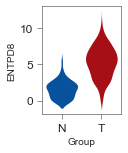

Normal vs Tumor (p)= 3.8187610889818564e-35


In [164]:
#单个基因表达：
#NME1/
GeneName='ENTPD8'
GeneDF=TN_RNA_log.copy()

hue='Group'
XaxisOrder=['N','T']
ColorList=['#08519C','#A50F15']
CellTypeColorsDict={'N':'#08519C','T':'#A50F15'}

ColorDict=CellTypeColorsDict

Dir='./DataProcess/DEGs/'
GeneExp=GeneDF.T[GeneName].to_frame()
MetaDFfilter=MetaDF.copy()
#step2:得到对应的MetaDF，by=hue
hueMataDF=MetaDFfilter[hue].to_frame()

GenePlotDF = pd.concat([hueMataDF, GeneExp], axis=1, join='inner')

plt.style.use('seaborn-white')
fig1=plt.figure(figsize=(2,3))
ax1=fig1.add_axes([0.3,0.32,0.55,0.5])
sns.violinplot(x=hue,y=GeneName,data=GenePlotDF,ax=ax1,order=XaxisOrder,linewidth=0.0,palette=(ColorList), width=0.8,inner="box",saturation=1,scale="width")
#sns.boxplot(x=hue,y=GeneName,data=GenePlotDF,order=XaxisOrder,ax=ax1,palette=(ColorList),linewidth=0.5, width=0.65,saturation=1.0)
ax1.tick_params(axis='x',length=5,width=0.5,labelsize=12,direction='out')
ax1.tick_params(axis='y',length=5,width=0.5,labelsize=12,direction='out')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.5)
ax1.spines['top'].set_linewidth(0.5)

#ax1.set_ylim([-0.5,2])
fig1.savefig(Dir+'{}.pdf'.format(GeneName))
plt.show()

print ('Normal vs Tumor (p)=',(scipy.stats.ttest_ind(list(GenePlotDF[GenePlotDF['Group']=='N'][GeneName]),list(GenePlotDF[GenePlotDF['Group']=='T'][GeneName]))[1]))



# LogFC和Pval计算

In [37]:
Ts=[i for i in list(TN_RNA_log) if '-01' in i]
Ns=[i for i in list(TN_RNA_log) if '-11' in i]

CountRA=TN_RNA_log[Ts]
CountOA=TN_RNA_log[Ns]

TN_RNA_log['logFC']=list((CountRA.apply(np.mean,axis=1)-CountOA.apply(np.mean,axis=1)))
TN_RNA_log['pval']=list((pd.Series(scipy.stats.ttest_ind(CountRA,CountOA,axis=1)[1],index=TN_RNA_log.index)))
TN_RNA_log=TN_RNA_log.sort_values('logFC',ascending=False)
TN_RNA_log.head()



/Users/ceci/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


TCGA-05-4244-01  TCGA-05-4249-01  TCGA-05-4250-01  \
Hugo_Symbol                                                      
FAM83A             10.853606        11.714512        11.968058   
COL11A1             7.092112         4.614875        10.593288   
CST1                7.738660         8.437881         4.385120   
AFAP1-AS1          11.476493        11.380109        11.833329   
CYP24A1             8.382252         4.200512         9.943738   

             TCGA-05-4382-01  TCGA-05-4384-01  TCGA-05-4389-01  \
Hugo_Symbol                                                      
FAM83A              9.585804        10.928578        10.564550   
COL11A1            12.436214         2.221939         6.799644   
CST1                9.307702         5.280741        14.265710   
AFAP1-AS1           6.899901         7.618283        10.728414   
CYP24A1             8.874422        10.321432         8.345010   

             TCGA-05-4390-01  TCGA-05-4395-01  TCGA-05-4396-01  \
Hugo_Symbol                                                      
FAM83A             12.290808        15.095562        11.905000   
COL11A1            10.823582         8.357376         5.281976   
CST1                6.425313         2.543966         9.136450   
AFAP1-AS1          10.578722         3.097493         4.085917   
CYP24A1             9.606481        14.016861         8.194205   

             TCGA-05-4397-01  ...  TCGA-73-4676-11  TCGA-91-6828-11  \
Hugo_Symbol                   ...                                     
FAM83A              8.288409  ...         2.362694         6.644367   
COL11A1             7.022246  ...         2.362694         2.893537   
CST1                2.844868  ...         0.000000         0.000000   
AFAP1-AS1           2.935969  ...         3.462942         3.579928   
CYP24A1             0.527771  ...         2.578214         6.202982   

             TCGA-91-6829-11  TCGA-91-6831-11  TCGA-91-6835-11  \
Hugo_Symbol                                                      
FAM83A              4.888982         1.077175         6.756196   
COL11A1             0.749920         1.077175         2.428705   
CST1                0.000000         0.000000         5.584142   
AFAP1-AS1           2.691556         2.711363         3.197425   
CYP24A1             2.347666         0.000000         4.957102   

             TCGA-91-6836-11  TCGA-91-6847-11  TCGA-91-6849-11     logFC  \
Hugo_Symbol                                                                
FAM83A              3.262208         4.185438         4.775909  6.235438   
COL11A1             3.139666         1.893323         3.660541  5.844431   
CST1                0.000000         0.000000         0.000000  5.833145   
AFAP1-AS1           5.300186         3.332980         2.504290  5.239427   
CYP24A1             3.985956         5.640066         5.397365  5.219689   

                     pval  
Hugo_Symbol                
FAM83A       3.999713e-76  
COL11A1      5.377487e-39  
CST1         2.655555e-39  
AFAP1-AS1    2.131477e-33  
CYP24A1      6.339379e-34  

[5 rows x 571 columns]

In [38]:
TN_RNA_log.to_csv('./DataProcess/TN_RNAexp_log.txt',sep='\t')

s=['logFC']
TN_RNA_log_GSAE=TN_RNA_log[s]
TN_RNA_log_GSAE.to_csv('./DataProcess/TN_RNAexp_log_ForGSEA.txt',sep='\t')

In [74]:
def FeatureScoreDistribution(FeatureGenesExpDF,cell1,cell2,dlabel,label,Cell,by,colorby,colorDict,ClusterOrder,AnnotationDF):
    Feature=list(ZSigExpDFSeurat.apply(sum,axis=1))

    
    Min=min(Feature)
    Range=max(Feature)-Min
    FeatureScore=[(i-Min)/(Range+0.0000001) for i in Feature ]
    AnnotationDF[label+"."+dlabel]=FeatureScore

    AnnotationDF['Color']=[colorDict[i] for i in AnnotationDF[colorby]]
    Outviolinplot=os.path.join(outDir,label+'{}_signature.pdf'.format(Cell))
    AnnotationDF=AnnotationDF.sort_values(by=[by,colorby])

   

    Order=ClusterOrder
    Palette=[AnnotationDF[AnnotationDF[by]==o]['Color'][0] for o in Order]


    plt.style.use('seaborn-white')
    #fig1=plt.figure(figsize=(1.2,4))
    fig1=plt.figure(figsize=(3,3))
    ax1=fig1.add_axes([0.25,0.3,0.7,0.65])
    #sns.boxplot(x=by,y=label+"."+dlabel,data=AnnotationDF,ax=ax1,saturation=1,linewidth=0.25,order=Order,palette=Palette,fliersize=0.0,width=0.55)
    sns.violinplot(x=by,y=label+"."+dlabel,data=AnnotationDF,ax=ax1,palette=(ColorList),linewidth=0.25, width=0.75,inner="box",saturation=1.0,scale="width")
    
    O=AnnotationDF.loc[cell1]
    Oscore=list(O[label+"."+dlabel])
    Y1=AnnotationDF.loc[cell2]
    Yscore1=list(Y1[label+"."+dlabel])

    pval_1=scipy.stats.ttest_ind(Oscore,Yscore1)[1]

    ax1.tick_params(axis='x',length=5,labelsize=10,direction='out',width=0.5)
    ax1.tick_params(axis='y',length=5,labelsize=10,direction='out',width=0.5)
    ax1.spines['bottom'].set_linewidth(0.5)
    ax1.spines['left'].set_linewidth(0.5)
    ax1.spines['right'].set_linewidth(0.0)
    ax1.spines['top'].set_linewidth(0.0)
    ax1.set_xticklabels(Order,rotation='horizontal')
    f=pval_1
    pval_1=float('%.2e'%f)

    ax1.set_ylabel('TvsN p = {}'.format(pval_1,fontsize=10))
    #ax1.set_ylabel(label,fontsize=14)

    #ax1.set_ylim([-0.2,1.2])
    plt.show()
    fig1.savefig(outDir+'{}_signature.pdf'.format(Cell)) 
    plt.close('all')
    plt.clf() 
    
    AnnotationDF.to_csv(outDir+'{}_._signature.txt'.format(Cell),sep='\t')
                   

In [75]:
outDir='./DataProcess/GSEA/'

#需要手动输入的变量以及文件： ClusterOrder 
ClusterOrder=['N','T']
ColorList=['#08519C','#A50F15']
ClusterDict={'N':'#08519C','T':'#A50F15'}

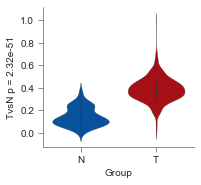

<Figure size 432x288 with 0 Axes>

In [76]:
label='KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM'

CellAll=list(MetaDF.index)
Cell1=list(MetaDF[(MetaDF['Group']=='N')].index)
Cell2=list(MetaDF[(MetaDF['Group']=='T')].index)

Signature='./DataProcess/GSEA/{}.txt'.format(label)
Sig=pd.read_csv(Signature,sep='\t',index_col=0)

GeneSig_overlap=[i for i in list(Sig.index) if i in list(TN_RNA_log.index)]
ZSigExpDFSeurat=TN_RNA_log.loc[GeneSig_overlap].dropna(how='all').T.apply(scipy.stats.mstats.zscore,axis=0)
ZSigExpDFSeurat=ZSigExpDFSeurat.loc[CellAll]
ZSigExpDFSeurat=ZSigExpDFSeurat.dropna(axis=1, how='any')
MetaDFsubCell=MetaDF.loc[CellAll]

FeatureScoreDistribution(ZSigExpDFSeurat,Cell1,Cell2,'RNAexp',label,label,'Group','Group',ClusterDict,ClusterOrder,MetaDF)




In [78]:
len(Cell2)

510

# 通路与临床指标的相关性

In [167]:
SigF='./DataProcess/KMsurvival/KM_signature_KEGG_PYRIMIDINE_METABOLISM.txt'
Sig=ReadTable(SigF)
len(Sig)

501

In [159]:

Sig['年龄']=Sig['Diagnosis Age']
Sig['性别']=Sig['Sex']
#Sig['肿瘤疾病分期']=Sig['Neoplasm Disease Stage American Joint Committee on Cancer Code']
#肿瘤疾病分期=TNM分期
#Sig['突变数目']=Sig['Mutation Count']
#Sig['癌症转移分期']=Sig['癌症转移分期']
#Sig['淋巴结分期']=Sig['Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code']
#Sig['肿瘤分期']=Sig['American Joint Committee on Cancer Tumor Stage Code']


#临床指标 - Count

In [142]:
#Sig_年龄=Sig[Sig.年龄.apply(lambda x: int(x))]
#list(set(Sig_年龄['年龄']))

Sig_临床指标=Sig.dropna(subset=['年龄'])

print ("临床指标 年龄：")
print (len(Sig_临床指标))
print (' ')

#年龄：
Sig_临床指标['年龄_2']=np.where(Sig_临床指标['年龄']>60,'Elder','Young')
print ('High: ')
for i in ['Young','Elder']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['年龄_2']==i]
    print (i,len(DF))
    
print (' ')
print ('Low: ')
for i in ['Young','Elder']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['年龄_2']==i]
    print (i,len(DF))
    


临床指标 年龄：
491
 
High: 
Young 83
Elder 158
 
Low: 
Young 74
Elder 176


<ipython-input-142-35b58169e833>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_临床指标['年龄_2']=np.where(Sig_临床指标['年龄']>60,'Elder','Young')


In [145]:
Sig_临床指标=Sig.dropna(subset=['突变数目'])
#Sig_临床指标['突变数目'].median()

print ("临床指标 突变数目：")
print (len(Sig_临床指标))
print (' ')

#年龄：
Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>195.5,'多','少')
print ('High: ')
for i in ['多','少']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
    
print (' ')
print ('Low: ')
for i in ['多','少']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
    


临床指标 突变数目：
496
 
High: 
多 123
少 124
 
Low: 
多 125
少 124


<ipython-input-145-1907b064e11a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>195.5,'多','少')


In [143]:
#性别

Sig_临床指标=Sig.dropna(subset=['性别'])

print ("临床指标 性别：")
print (len(Sig_临床指标))
print (' ')

#年龄：
print ('High: ')
for i in ['Male','Female']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['性别']==i]
    print (i,len(DF))
    
print (' ')
print ('Low: ')
for i in ['Male','Female']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['性别']==i]
    print (i,len(DF))
    


临床指标 性别：
501
 
High: 
Male 113
Female 138
 
Low: 
Male 120
Female 130


In [ ]:
#list(set(Sig['突变数目']))
frame[' ']=frmae.city.apply(lambda x:1 if 'ing' in x else 0)

In [160]:
list(set(Sig['肿瘤疾病分期']))

['II', 'IV', '未知', 'I', 'III']

In [161]:
#肿瘤疾病分期

Sig_临床指标=Sig[Sig['肿瘤疾病分期']!='未知']

print ("临床指标 肿瘤疾病分期：")
print (len(Sig_临床指标))
print (' ')

#年龄：
print ('High: ')
for i in ['I','II','III','IV']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['肿瘤疾病分期']==i]
    print (i,len(DF))
    
print (' ')
print ('Low: ')
for i in ['I','II','III','IV']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['肿瘤疾病分期']==i]
    print (i,len(DF))
    

临床指标 肿瘤疾病分期：
499
 
High: 
I 144
II 65
III 29
IV 13
 
Low: 
I 127
II 56
III 51
IV 14


In [162]:
#远处转移：有/无

#肿瘤疾病分期

Sig_临床指标=Sig[Sig['癌症转移分期']!='未知']

print ("临床指标 癌症转移分期：")
print (len(Sig_临床指标))
print (' ')

#年龄：
print ('High: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['癌症转移分期']==i]
    print (i,len(DF))
    
print (' ')
print ('Low: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['癌症转移分期']==i]
    print (i,len(DF))
    

临床指标 癌症转移分期：
357
 
High: 
有 13
无 181
 
Low: 
有 12
无 151


In [163]:
#淋巴结转移：有/无


Sig_临床指标=Sig[Sig['淋巴结分期']!='未知']

print ("临床指标 淋巴结分期：")
print (len(Sig_临床指标))
print (' ')

#年龄：
print ('High: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['淋巴结分期']==i]
    print (i,len(DF))
    
print (' ')
print ('Low: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['淋巴结分期']==i]
    print (i,len(DF))
    

临床指标 淋巴结分期：
490
 
High: 
有 78
无 168
 
Low: 
有 89
无 155


In [168]:

#浸润深度：T1+T2/T3+T4

Sig_临床指标=Sig[Sig['淋巴结分期']!='未知']

print ("临床指标 浸润深度：")
print (len(Sig_临床指标))
print (' ')

#年龄：
print ('High: ')
for i in ['T1+T2','T3+T4']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['浸润深度']==i]
    print (i,len(DF))
    
print (' ')
print ('Low: ')
for i in ['T1+T2','T3+T4']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['浸润深度']==i]
    print (i,len(DF))
    

临床指标 浸润深度：
490
 
High: 
T1+T2 221
T3+T4 25
 
Low: 
T1+T2 206
T3+T4 38


In [175]:
#某指标与XX的相关性
a=45
b=40
c=30
d=31

ChiTest = np.array([[a, b], [c, d]])
ChiP=chi2_contingency(ChiTest,correction=False)[1]
oddsratio, FisherP = stats.fisher_exact([[a, b], [c, d]])
hyper=stats.hypergeom.pmf(a, a+b+c+d, a+b, a+c)

#print ('ChiTest',ChiP)
print ('FisherP', FisherP)
#print ('hyper', hyper)

FisherP 0.7375958535662149


# 临床指标与嘧啶代谢通路的相关性

In [182]:
#TNM分期：
a=144
b=65
c=29
d=13
e=127
f=56
g=51
h=14

ChiTest = np.array([[a, b,c,d], [e,f,g,h]])
ChiP=chi2_contingency(ChiTest,correction=False)[1]

print ('ChiTest',ChiP)
#print ('FisherP', FisherP)
#print ('hyper', hyper)

ChiTest 0.050215636391974815


In [240]:
#性别：
a=18
b=127
c=170
d=162


ChiTest = np.array([[a, b], [c,d]])
ChiP=chi2_contingency(ChiTest,correction=False)[1]

print ('ChiTest',ChiP)
#print ('FisherP', FisherP)
#print ('hyper', hyper)

ChiTest 1.527218647509791e-15


# 差异基因火山图

In [274]:
Dir='./DataProcess/DEGs'
def VolcanoPlot(FOLD,PVAL,TXT):
    pvalue=PVAL.apply(log10)
    p_sig=(pvalue>20)&(FOLD<2)&(FOLD>-2)
    h_up=(FOLD>2)&(pvalue>20) #F79494
    h_up_no=(FOLD>2) #F79494
    c_up=(FOLD<-2)&(pvalue>20) #8ADFED
    c_up_no=(FOLD<-2) #8ADFED
    text=((FOLD>2)&(pvalue>20)) | ((FOLD<-2)&(pvalue>20))
    
    Dif=pd.DataFrame({'FOLD':FOLD,'pvalue':pvalue})
    Dif_p=Dif[p_sig]
    Dif_h=Dif[h_up]
    Dif_h_no=Dif[h_up_no]
    Dif_c=Dif[c_up]
    Dif_c_no=Dif[c_up_no]
    Dif_text=Dif[text]
    
    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(5,5))
    ax=fig.add_axes([0.2,0.2,0.7,0.7])
    ax.tick_params(axis='y',length=6,width=0.5,labelsize=10,direction='out')
    ax.tick_params(axis='x',length=6,width=0.5,labelsize=10,direction='out')
    ax.set_ylabel('-log10 P-value',fontsize=14)
    ax.set_xlabel('log2 mean FC',fontsize=14)
    ax.set_xlim([-9,9])
    #ax.set_ylim([-0.3,y])
    ax.scatter(Dif['FOLD'],Dif['pvalue'],c='#C8C6C6',alpha=0.35,s=5,edgecolor='none')
    ax.scatter(Dif_p['FOLD'],Dif_p['pvalue'],c='#FBE0C4',alpha=0.85,s=5,edgecolor='none')
    
    ax.scatter(Dif_h_no['FOLD'],Dif_h_no['pvalue'],c='#C8C6C6',alpha=1,s=5,edgecolor='none')
    ax.scatter(Dif_c_no['FOLD'],Dif_c_no['pvalue'],c='#C8C6C6',alpha=1,s=5,edgecolor='none')
    
    #ax.scatter(Dif_h_no['FOLD'],Dif_h_no['pvalue'],c='#FDD2BF',alpha=1,s=5,edgecolor='none')
    #ax.scatter(Dif_c_no['FOLD'],Dif_c_no['pvalue'],c='#D7E9F7',alpha=1,s=5,edgecolor='none')
    ax.scatter(Dif_h['FOLD'],Dif_h['pvalue'],c='#CE1212',alpha=1,s=8,edgecolor='none')
    ax.scatter(Dif_c['FOLD'],Dif_c['pvalue'],c='#0061A8',alpha=1,s=8,edgecolor='none')
    
    ax.axhline(y=20,ls='--',color='darkgray',alpha=0.6)
    ax.axvline(x=-2,ls='--',color='darkgray',alpha=0.6)
    ax.axvline(x=2,ls='--',color='darkgray',alpha=0.6)
    
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)


    if TXT:
        for i in range(len(Dif_text['FOLD'])):
            plt.annotate(list(Dif_text.index)[i], xy = (Dif_text['FOLD'][i], Dif_text['pvalue'][i]), xytext = (Dif_text['FOLD'][i]+0.1, Dif_text['pvalue'][i]+0.1),fontsize=5)
        plt.savefig(Dir+'/Volcanoplot_text.png',dpi=1000)
        plt.show()
    else:
        plt.savefig(Dir+'/Volcanoplot.png',dpi=1000)
        plt.show()
        
        

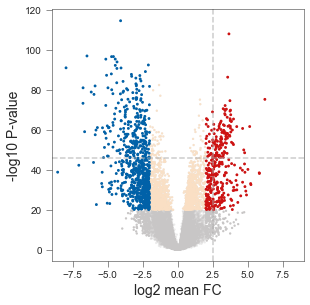

In [10]:
Dir='./DataProcess/DEGs'
def VolcanoPlot(FOLD,PVAL,TXT):
    pvalue=PVAL.apply(log10)
    p_sig=(pvalue>20)&(FOLD>-2)&(FOLD<2)
    h_up=(FOLD>2)&(pvalue>20) #F79494
    h_up_no=(FOLD>2) #F79494
    c_up=(FOLD<-2)&(pvalue>20) #8ADFED
    c_up_no=(FOLD<-2) #8ADFED
    text=((FOLD>2)&(pvalue>20)) | ((FOLD<-2)&(pvalue>20))
    
    Dif=pd.DataFrame({'FOLD':FOLD,'pvalue':pvalue})
    Dif_p=Dif[p_sig]
    Dif_h=Dif[h_up]
    Dif_h_no=Dif[h_up_no]
    Dif_c=Dif[c_up]
    Dif_c_no=Dif[c_up_no]
    Dif_text=Dif[text]
    
    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(5,5))
    ax=fig.add_axes([0.2,0.2,0.7,0.7])
    ax.tick_params(axis='y',length=6,width=0.5,labelsize=10,direction='out')
    ax.tick_params(axis='x',length=6,width=0.5,labelsize=10,direction='out')
    ax.set_ylabel('-log10 P-value',fontsize=14)
    ax.set_xlabel('log2 mean FC',fontsize=14)
    ax.set_xlim([-9,9])
    #ax.set_ylim([-0.3,y])
    Dif_h.to_csv('./DataProcess/DEGs/DEGs_up.txt',sep='\t')
    Dif_c.to_csv('./DataProcess/DEGs/DEGs_down.txt',sep='\t')
    ax.scatter(Dif['FOLD'],Dif['pvalue'],c='#C8C6C6',alpha=0.35,s=5,edgecolor='none')
    ax.scatter(Dif_p['FOLD'],Dif_p['pvalue'],c='#FBE0C4',alpha=0.85,s=5,edgecolor='none')
    
    ax.scatter(Dif_h_no['FOLD'],Dif_h_no['pvalue'],c='#C8C6C6',alpha=1,s=5,edgecolor='none')
    ax.scatter(Dif_c_no['FOLD'],Dif_c_no['pvalue'],c='#C8C6C6',alpha=1,s=5,edgecolor='none')
    
    #ax.scatter(Dif_h_no['FOLD'],Dif_h_no['pvalue'],c='#FDD2BF',alpha=1,s=5,edgecolor='none')
    #ax.scatter(Dif_c_no['FOLD'],Dif_c_no['pvalue'],c='#D7E9F7',alpha=1,s=5,edgecolor='none')
    ax.scatter(Dif_h['FOLD'],Dif_h['pvalue'],c='#CE1212',alpha=1,s=8,edgecolor='none')
    ax.scatter(Dif_c['FOLD'],Dif_c['pvalue'],c='#0061A8',alpha=1,s=8,edgecolor='none')
    

    ax.axvline(x=2.503775, ls='--',color='darkgray',alpha=0.6)
    ax.axhline(y=46, ls='--',color='darkgray',alpha=0.6)
    
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)


    if TXT:
        for i in range(len(Dif_text['FOLD'])):
            plt.annotate(list(Dif_text.index)[i], xy = (Dif_text['FOLD'][i], Dif_text['pvalue'][i]), xytext = (Dif_text['FOLD'][i]+0.1, Dif_text['pvalue'][i]+0.1),fontsize=5)
        plt.savefig(Dir+'/Volcanoplot_text.png',dpi=1000)
        plt.show()
    else:
        plt.savefig(Dir+'/Volcanoplot_TK1.png',dpi=1000)
        plt.show()

VolcanoPlot(FDC,pval,TXT=False)
        

In [3]:
F='./DataProcess/TN_RNAexp_log_data.txt'
RNA=ReadTable(F)

RAs=[i for i in list(RNA) if '-01' in i]
OAs=[i for i in list(RNA) if '-11' in i]
#DFsum=RNA.apply(np.sum,axis=1)>1
#DFfilter=RNA[DFsum]
#print ('Filter GeneNmuber : ',len(DFfilter))
CountRA=RNA[RAs]
CountOA=RNA[OAs]
FDC=CountRA.apply(np.mean,axis=1)-CountOA.apply(np.mean,axis=1)
pval=pd.Series(scipy.stats.ttest_ind(CountRA,CountOA,axis=1)[1],index=CountRA.index)


/Users/ceci/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [4]:
VolcanoPlot(FDC,pval,TXT=False)
#VolcanoPlot(FDC,pval,TXT=True)

NameError: name 'VolcanoPlot' is not defined

In [245]:
F='/Users/ceci/Project/阿_/cBioPortal/DataProcess/TN_RNAexp_log.txt'
DF=ReadTable(F)

KEGGF='/Users/ceci/Project/阿_/cBioPortal/DataProcess/GSEA/KEGG_PYRIMIDINE_METABOLISM.txt'
KEGG=ReadTable(KEGGF)


DF_KEGG=DF.loc[list(KEGG.index)]
DF_KEGG_T=DF_KEGG.T

F='/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/KM_signature.txt'
KM=ReadTable(F)
DF_KEGG_T=DF_KEGG_T.loc[list(KM.index)]
DF_KEGG_T['futime']=KM['futime']
DF_KEGG_T['fustat']=KM['fustat']
DF_KEGG_T.to_csv('/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/KM_Genes/KM_嘧啶代谢Genes.txt',sep='\t')

In [286]:
DF_KEGG_filter=DF_KEGG[(np.abs(DF_KEGG['logFC'])>2) & (DF_KEGG['pval']<0.0000000001)]
DF_KEGG_filter



TCGA-05-4244-01  TCGA-05-4249-01  TCGA-05-4250-01  \
Hugo_Symbol                                                      
TYMS                9.245619         7.982874         9.376004   
NME1               11.688862        10.710849        12.279518   
ENTPD8              3.058403         4.670653         0.996244   
POLE2               6.552328         5.421371         7.162422   
RRM2               10.519774         7.917814        11.482798   
TK1                10.720552         8.493071        12.162999   

             TCGA-05-4382-01  TCGA-05-4384-01  TCGA-05-4389-01  \
Hugo_Symbol                                                      
TYMS                9.292234         7.186233         9.859101   
NME1               10.971644         9.725477        12.343641   
ENTPD8              7.032784         6.801779         6.186106   
POLE2               5.589251         2.557533         7.721557   
RRM2                9.197942         7.883780        10.255194   
TK1                 9.701034         7.783352        11.100859   

             TCGA-05-4390-01  TCGA-05-4395-01  TCGA-05-4396-01  \
Hugo_Symbol                                                      
TYMS                9.498524         8.708860         7.601169   
NME1               12.080371        12.589597         8.823975   
ENTPD8              4.764765         5.121985         9.385711   
POLE2               8.024037         6.489504         5.070411   
RRM2               10.784937        11.064615         8.801010   
TK1                11.214453        11.608574         8.125367   

             TCGA-05-4397-01  ...  TCGA-73-4676-11  TCGA-91-6828-11  \
Hugo_Symbol                   ...                                     
TYMS               11.480967  ...         7.951774         5.973003   
NME1               11.072314  ...         9.656639         7.977080   
ENTPD8              6.800072  ...         0.000000         2.459851   
POLE2               8.606353  ...         3.557361         2.893537   
RRM2               11.955032  ...         7.899810         5.863807   
TK1                11.009493  ...         8.771077         7.060437   

             TCGA-91-6829-11  TCGA-91-6831-11  TCGA-91-6835-11  \
Hugo_Symbol                                                      
TYMS                7.441865         6.075237         7.624079   
NME1                9.485813         8.061560         9.057737   
ENTPD8              2.966541         0.000000         3.885447   
POLE2               3.999693         1.686971         4.212297   
RRM2                7.494072         5.468753         6.559478   
TK1                 8.414262         6.235762         7.174157   

             TCGA-91-6836-11  TCGA-91-6847-11  TCGA-91-6849-11     logFC  \
Hugo_Symbol                                                                
TYMS                6.007673         5.835406         6.692009  2.056544   
NME1                8.274537         8.419552         8.427648  2.182783   
ENTPD8              0.832931         1.893323         2.997708  3.734325   
POLE2               3.375151         1.490570         2.685828  2.695039   
RRM2                5.432659         5.413763         5.790389  3.069998   
TK1                 6.291865         7.133060         6.959330  2.503775   

                     pval  
Hugo_Symbol                
TYMS         1.710805e-41  
NME1         1.651715e-62  
ENTPD8       3.818761e-35  
POLE2        1.383213e-44  
RRM2         2.078868e-53  
TK1          1.489683e-46  

[6 rows x 571 columns]

In [287]:
DF_KEGG_filter

TCGA-05-4244-01  TCGA-05-4249-01  TCGA-05-4250-01  \
Hugo_Symbol                                                      
TYMS                9.245619         7.982874         9.376004   
NME1               11.688862        10.710849        12.279518   
ENTPD8              3.058403         4.670653         0.996244   
POLE2               6.552328         5.421371         7.162422   
RRM2               10.519774         7.917814        11.482798   
TK1                10.720552         8.493071        12.162999   

             TCGA-05-4382-01  TCGA-05-4384-01  TCGA-05-4389-01  \
Hugo_Symbol                                                      
TYMS                9.292234         7.186233         9.859101   
NME1               10.971644         9.725477        12.343641   
ENTPD8              7.032784         6.801779         6.186106   
POLE2               5.589251         2.557533         7.721557   
RRM2                9.197942         7.883780        10.255194   
TK1                 9.701034         7.783352        11.100859   

             TCGA-05-4390-01  TCGA-05-4395-01  TCGA-05-4396-01  \
Hugo_Symbol                                                      
TYMS                9.498524         8.708860         7.601169   
NME1               12.080371        12.589597         8.823975   
ENTPD8              4.764765         5.121985         9.385711   
POLE2               8.024037         6.489504         5.070411   
RRM2               10.784937        11.064615         8.801010   
TK1                11.214453        11.608574         8.125367   

             TCGA-05-4397-01  ...  TCGA-73-4676-11  TCGA-91-6828-11  \
Hugo_Symbol                   ...                                     
TYMS               11.480967  ...         7.951774         5.973003   
NME1               11.072314  ...         9.656639         7.977080   
ENTPD8              6.800072  ...         0.000000         2.459851   
POLE2               8.606353  ...         3.557361         2.893537   
RRM2               11.955032  ...         7.899810         5.863807   
TK1                11.009493  ...         8.771077         7.060437   

             TCGA-91-6829-11  TCGA-91-6831-11  TCGA-91-6835-11  \
Hugo_Symbol                                                      
TYMS                7.441865         6.075237         7.624079   
NME1                9.485813         8.061560         9.057737   
ENTPD8              2.966541         0.000000         3.885447   
POLE2               3.999693         1.686971         4.212297   
RRM2                7.494072         5.468753         6.559478   
TK1                 8.414262         6.235762         7.174157   

             TCGA-91-6836-11  TCGA-91-6847-11  TCGA-91-6849-11     logFC  \
Hugo_Symbol                                                                
TYMS                6.007673         5.835406         6.692009  2.056544   
NME1                8.274537         8.419552         8.427648  2.182783   
ENTPD8              0.832931         1.893323         2.997708  3.734325   
POLE2               3.375151         1.490570         2.685828  2.695039   
RRM2                5.432659         5.413763         5.790389  3.069998   
TK1                 6.291865         7.133060         6.959330  2.503775   

                     pval  
Hugo_Symbol                
TYMS         1.710805e-41  
NME1         1.651715e-62  
ENTPD8       3.818761e-35  
POLE2        1.383213e-44  
RRM2         2.078868e-53  
TK1          1.489683e-46  

[6 rows x 571 columns]

In [258]:

DF_filter=DF[(np.abs(DF['logFC'])>2) & (DF['pval']<0.0000000001)]
DF_filter



TCGA-05-4244-01  TCGA-05-4249-01  TCGA-05-4250-01  \
Hugo_Symbol                                                      
FAM83A             10.853606        11.714512        11.968058   
COL11A1             7.092112         4.614875        10.593288   
CST1                7.738660         8.437881         4.385120   
AFAP1-AS1          11.476493        11.380109        11.833329   
CYP24A1             8.382252         4.200512         9.943738   
...                      ...              ...              ...   
ITLN2               3.174502         2.077106         1.218099   
AGER               10.066493         9.812076         8.143914   
CLDN18              8.921282         8.674535         8.432646   
SLC6A4              5.679936         1.962586         2.800890   
SFTPC              12.383388        11.239366        11.753722   

             TCGA-05-4382-01  TCGA-05-4384-01  TCGA-05-4389-01  \
Hugo_Symbol                                                      
FAM83A              9.585804        10.928578        10.564550   
COL11A1            12.436214         2.221939         6.799644   
CST1                9.307702         5.280741        14.265710   
AFAP1-AS1           6.899901         7.618283        10.728414   
CYP24A1             8.874422        10.321432         8.345010   
...                      ...              ...              ...   
ITLN2               1.284396         5.567618         0.417488   
AGER                7.074366        11.579726         7.002039   
CLDN18              1.543199        11.211396         6.604497   
SLC6A4              5.026273         8.594179         1.421102   
SFTPC               2.803764        15.437355         8.471785   

             TCGA-05-4390-01  TCGA-05-4395-01  TCGA-05-4396-01  \
Hugo_Symbol                                                      
FAM83A             12.290808        15.095562        11.905000   
COL11A1            10.823582         8.357376         5.281976   
CST1                6.425313         2.543966         9.136450   
AFAP1-AS1          10.578722         3.097493         4.085917   
CYP24A1             9.606481        14.016861         8.194205   
...                      ...              ...              ...   
ITLN2               0.000000         0.620023         1.331304   
AGER                4.764765         4.096464         5.607730   
CLDN18              1.187324         1.227864         4.860546   
SLC6A4              0.000000         0.620023         1.711275   
SFTPC               1.543991         1.052277         8.032343   

             TCGA-05-4397-01  ...  TCGA-73-4676-11  TCGA-91-6828-11  \
Hugo_Symbol                   ...                                     
FAM83A              8.288409  ...         2.362694         6.644367   
COL11A1             7.022246  ...         2.362694         2.893537   
CST1                2.844868  ...         0.000000         0.000000   
AFAP1-AS1           2.935969  ...         3.462942         3.579928   
CYP24A1             0.527771  ...         2.578214         6.202982   
...                      ...  ...              ...              ...   
ITLN2               1.348289  ...         9.528468         8.607578   
AGER                5.993851  ...        15.726742        15.753768   
CLDN18              2.844868  ...        14.929684        15.005576   
SLC6A4              0.733441  ...        12.349577        12.253455   
SFTPC               6.176758  ...        19.601161        18.855872   

             TCGA-91-6829-11  TCGA-91-6831-11  TCGA-91-6835-11  \
Hugo_Symbol                                                      
FAM83A              4.888982         1.077175         6.756196   
COL11A1             0.749920         1.077175         2.428705   
CST1                0.000000         0.000000         5.584142   
AFAP1-AS1           2.691556         2.711363         3.197425   
CYP24A1             2.347666         0.000000         4.957102   
...                      ...              ...     

In [300]:
DF_KEGG_T.head()

Hugo_Symbol          NT5C2     POLR2G     POLR2H     POLR2E     POLR2F  \
TCGA-78-7163-01  10.849444  10.768226   9.472502  11.502136   8.359982   
TCGA-78-8640-01  12.096425   9.091224  10.415573  12.046353   9.325755   
TCGA-49-AARQ-01  10.912867   9.846529  11.093596  11.080178  10.566749   
TCGA-49-AARR-01  10.789615   9.297240   9.721911  11.147936   8.865458   
TCGA-78-7143-01  11.774540   9.440574  10.219725  10.571857   8.919432   

Hugo_Symbol         POLR2I     POLR2J      POLE3       TYMS     TXNRD1  ...  \
TCGA-78-7163-01   9.230631  10.778102  11.103799   6.060700  11.845298  ...   
TCGA-78-8640-01   9.129919  11.121339  10.443648   9.172660  14.774905  ...   
TCGA-49-AARQ-01  10.606081  11.803792   9.793631   9.656394  10.748277  ...   
TCGA-49-AARR-01   9.289980   9.360202   9.818831   7.301396  11.287591  ...   
TCGA-78-7143-01   8.336078   9.886151  10.559530  10.487247  11.192447  ...   

Hugo_Symbol        ENTPD5    ENTPD3     ENTPD1    NT5C1B      NT5C      NME7  \
TCGA-78-7163-01  7.294630  8.833949   9.647748  4.849934  8.164329  7.458251   
TCGA-78-8640-01  7.505534  6.349174  10.344828  1.459694  8.448566  7.843739   
TCGA-49-AARQ-01  7.377870  7.238405  10.616126  4.095072  9.139349  7.239045   
TCGA-49-AARR-01  7.405848  8.353085  10.512622  2.932345  8.808983  9.298947   
TCGA-78-7143-01  7.208195  9.457412   9.737563  1.286585  8.296182  8.430381   

Hugo_Symbol            AK3     ZNRD1  futime  fustat  
TCGA-78-7163-01  10.601474  8.562708     238       0  
TCGA-78-8640-01   9.044162  8.879828     232       0  
TCGA-49-AARQ-01  10.866298  9.332238     221       0  
TCGA-49-AARR-01  10.396723  8.222558     164       0  
TCGA-78-7143-01  10.235883  8.190264     163       1  

[5 rows x 100 columns]

In [301]:
F='/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/KM_Genes/KM_signature_KEGG_PYRIMIDINE_METABOLISM.txt'
DF=ReadTable(F)
DF.head()

Group    Color  KEGG_PYRIMIDINE_METABOLISM.RNAexp  \
sample                                                              
TCGA-69-8254-01     T  #A50F15                           0.446480   
TCGA-L4-A4E5-01     T  #A50F15                           0.661126   
TCGA-50-6673-01     T  #A50F15                           0.494680   
TCGA-97-8552-01     T  #A50F15                           0.516939   
TCGA-69-7980-01     T  #A50F15                           0.570992   

                signature_group  Diagnosis Age  \
sample                                           
TCGA-69-8254-01             low           85.0   
TCGA-L4-A4E5-01             low           48.0   
TCGA-50-6673-01             low           84.0   
TCGA-97-8552-01             low           55.0   
TCGA-69-7980-01             low           70.0   

                Neoplasm Disease Stage American Joint Committee on Cancer Code  \
sample                                                                           
TCGA-69-8254-01                                                NaN               
TCGA-L4-A4E5-01                                            STAGE I               
TCGA-50-6673-01                                            STAGE I               
TCGA-97-8552-01                                            STAGE I               
TCGA-69-7980-01                                            STAGE I               

                American Joint Committee on Cancer Publication Version Type  \
sample                                                                        
TCGA-69-8254-01                                                7TH            
TCGA-L4-A4E5-01                                                7TH            
TCGA-50-6673-01                                                6TH            
TCGA-97-8552-01                                                7TH            
TCGA-69-7980-01                                                7TH            

                 Aneuploidy Score  Buffa Hypoxia Score  \
sample                                                   
TCGA-69-8254-01               1.0                  -31   
TCGA-L4-A4E5-01              17.0                   17   
TCGA-50-6673-01              18.0                   -5   
TCGA-97-8552-01              21.0                  -35   
TCGA-69-7980-01              22.0                  -17   

                                Cancer Type  ... Tumor Disease Anatomic Site  \
sample                                       ...                               
TCGA-69-8254-01  Non-Small Cell Lung Cancer  ...                        Lung   
TCGA-L4-A4E5-01  Non-Small Cell Lung Cancer  ...                        Lung   
TCGA-50-6673-01  Non-Small Cell Lung Cancer  ...                        Lung   
TCGA-97-8552-01  Non-Small Cell Lung Cancer  ...                        Lung   
TCGA-69-7980-01  Non-Small Cell Lung Cancer  ...                        Lung   

                                                      Tumor Type  \
sample                                                             
TCGA-69-8254-01               Lung Adenocarcinoma, Mixed Subtype   
TCGA-L4-A4E5-01                        Lung Adenocarcinoma (NOS)   
TCGA-50-6673-01                        Lung Adenocarcinoma (NOS)   
TCGA-97-8552-01  Lung Bronchioloalveolar Carcinoma, Non-Mucinous   
TCGA-69-7980-01                        Lung Adenocarcinoma (NOS)   

                Patient Weight  Winter Hypoxia Score     futime  fustat  \
sample                                                                    
TCGA-69-8254-01            NaN                   -32  13.446428       0   
TCGA-L4-A4E5-01            NaN                    20  19.002531       0   
TCGA-50-6673-01            NaN                    -4   0.723280       1   
TCGA-97-8552-01            NaN                   -24  20.580596       0   
TCGA-69-7980-01            NaN                    -4  13.512181       0   

                 癌症转移分期 淋巴结分期   浸润深度 肿瘤疾病分期  
sample                             

In [310]:
F='/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/KM_Genes/KM_signature_KEGG_PYRIMIDINE_METABOLISM.txt'
DF=ReadTable(F)

DF_KEGG_T=DF_KEGG_T.loc[list(DF.index)]
DF_KEGG_T['年龄']=DF['Diagnosis Age']
DF_KEGG_T['性别']=DF['Sex']
DF_KEGG_T['肿瘤疾病分期']=DF['肿瘤疾病分期']
DF_KEGG_T['癌症转移分期']=DF['癌症转移分期']
DF_KEGG_T['淋巴结分期']=DF['淋巴结分期']
DF_KEGG_T['浸润深度']=DF['浸润深度']
DF_KEGG_T['突变数目']=DF['Mutation Count']
DF_KEGG_T['TMB']=DF['TMB (nonsynonymous)']

DF_KEGG_T.to_csv('/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/KM_Genes/KM_Genes_临床指标2.txt',sep='\t')

# 基因与临床指标：

In [311]:
gene='TYMS'

Sig=DF_KEGG_T.copy()
np.median(list(Sig[gene]))


9.034614659923292

In [312]:
DF_KEGG_T.head()

Hugo_Symbol          NT5C2     POLR2G     POLR2H     POLR2E    POLR2F  \
TCGA-69-8254-01  11.420918   8.736297   9.577130  11.473802  9.206929   
TCGA-L4-A4E5-01  11.008856  10.221793  10.391222  11.338402  9.004990   
TCGA-50-6673-01  10.809004   8.628774   8.896644  11.247103  9.182201   
TCGA-97-8552-01  11.084224   9.816360   9.500187  11.553572  9.592412   
TCGA-69-7980-01  10.809093   9.262882   9.519760  11.247560  9.109781   

Hugo_Symbol        POLR2I     POLR2J      POLE3       TYMS     TXNRD1  ...  \
TCGA-69-8254-01  9.060782   9.694036  10.043301   8.994416  11.814723  ...   
TCGA-L4-A4E5-01  8.509142  10.858564  10.889694  11.146072  11.316689  ...   
TCGA-50-6673-01  9.167825   8.851815   9.698812   8.828955  12.122029  ...   
TCGA-97-8552-01  9.158640  10.408903   9.886812   7.502712  10.450984  ...   
TCGA-69-7980-01  9.456075   9.549540  10.421634  10.941554  11.809796  ...   

Hugo_Symbol      futime  fustat    年龄      性别  肿瘤疾病分期  癌症转移分期  淋巴结分期   浸润深度  \
TCGA-69-8254-01      13       0  85.0    Male      未知      未知     未知  T1+T2   
TCGA-L4-A4E5-01      19       0  48.0  Female       I       无      无  T1+T2   
TCGA-50-6673-01       1       1  84.0  Female       I       无      无  T1+T2   
TCGA-97-8552-01      21       0  55.0  Female       I      未知      无  T1+T2   
TCGA-69-7980-01      14       0  70.0  Female       I       无      无  T1+T2   

Hugo_Symbol       突变数目        TMB  
TCGA-69-8254-01   76.0   2.533333  
TCGA-L4-A4E5-01  298.0   9.933333  
TCGA-50-6673-01   86.0   2.866667  
TCGA-97-8552-01   23.0   0.766667  
TCGA-69-7980-01  738.0  24.566667  

[5 rows x 108 columns]

In [325]:
#TYMS, NME1, ENTPD8, POLE2, RRM2, TK1
gene='RRM2'

Sig=DF_KEGG_T.copy()
Sig['signature_group']=np.where(Sig[gene]>=np.median(list(Sig[gene])),'high','low')
Gene_High=Sig[Sig['signature_group']=='high']
Gene_low=Sig[Sig['signature_group']=='low']

print (gene, 'high=', len(Gene_High),'low=', len(Gene_low))
print (' ')


Sig_临床指标=Sig.dropna(subset=['突变数目'])
#Sig_临床指标['突变数目'].median()
print ("临床指标 突变数目：")
print (len(Sig_临床指标))
Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>=np.median(list(Sig_临床指标['突变数目'])),'more','less')
print ('High: ')
for i in ['more','less']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
print ('Low: ')
for i in ['more','less']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
    
Sig_临床指标.head()

RRM2 high= 251 low= 250
 
临床指标 突变数目：
496
High: 
more 159
less 89
Low: 
more 89
less 159


<ipython-input-325-ee6c257cfc91>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>=np.median(list(Sig_临床指标['突变数目'])),'more','less')


Hugo_Symbol          NT5C2     POLR2G     POLR2H     POLR2E    POLR2F  \
TCGA-69-8254-01  11.420918   8.736297   9.577130  11.473802  9.206929   
TCGA-L4-A4E5-01  11.008856  10.221793  10.391222  11.338402  9.004990   
TCGA-50-6673-01  10.809004   8.628774   8.896644  11.247103  9.182201   
TCGA-97-8552-01  11.084224   9.816360   9.500187  11.553572  9.592412   
TCGA-69-7980-01  10.809093   9.262882   9.519760  11.247560  9.109781   

Hugo_Symbol        POLR2I     POLR2J      POLE3       TYMS     TXNRD1  ...  \
TCGA-69-8254-01  9.060782   9.694036  10.043301   8.994416  11.814723  ...   
TCGA-L4-A4E5-01  8.509142  10.858564  10.889694  11.146072  11.316689  ...   
TCGA-50-6673-01  9.167825   8.851815   9.698812   8.828955  12.122029  ...   
TCGA-97-8552-01  9.158640  10.408903   9.886812   7.502712  10.450984  ...   
TCGA-69-7980-01  9.456075   9.549540  10.421634  10.941554  11.809796  ...   

Hugo_Symbol        年龄      性别  肿瘤疾病分期  癌症转移分期  淋巴结分期   浸润深度   突变数目        TMB  \
TCGA-69-8254-01  85.0    Male      未知      未知     未知  T1+T2   76.0   2.533333   
TCGA-L4-A4E5-01  48.0  Female       I       无      无  T1+T2  298.0   9.933333   
TCGA-50-6673-01  84.0  Female       I       无      无  T1+T2   86.0   2.866667   
TCGA-97-8552-01  55.0  Female       I      未知      无  T1+T2   23.0   0.766667   
TCGA-69-7980-01  70.0  Female       I       无      无  T1+T2  738.0  24.566667   

Hugo_Symbol      signature_group  突变数目_2  
TCGA-69-8254-01              low    less  
TCGA-L4-A4E5-01             high    more  
TCGA-50-6673-01             high    less  
TCGA-97-8552-01              low    less  
TCGA-69-7980-01             high    more  

[5 rows x 110 columns]

In [319]:
#TYMS, NME1, ENTPD8, POLE2, RRM2, TK1
gene='TK1'

Sig=DF_KEGG_T.copy()
Sig['signature_group']=np.where(Sig[gene]>=np.median(list(Sig[gene])),'high','low')
Gene_High=Sig[Sig['signature_group']=='high']
Gene_low=Sig[Sig['signature_group']=='low']

print (gene, 'high=', len(Gene_High),'low=', len(Gene_low))
print (' ')


Sig_临床指标=Sig.dropna(subset=['突变数目'])
#Sig_临床指标['突变数目'].median()
print ("临床指标 突变数目：")
print (len(Sig_临床指标))
Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>195.5,'more','less')
print ('High: ')
for i in ['多','少']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
print ('Low: ')
for i in ['多','少']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
    

#TMB：
Sig_临床指标=Sig.dropna(subset=['TMB'])
print ("临床指标 TMB：")
print (len(Sig_临床指标))
Sig_临床指标['TMB_2']=np.where(Sig_临床指标['TMB']>60,'More','Less')
print ('High: ')
for i in ['More','Less']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['TMB_2']==i]
    print (i,len(DF))    
print ('Low: ')
for i in ['More','Less']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['TMB_2']==i]
    print (i,len(DF))
       
    
#年龄：
Sig_临床指标=Sig.dropna(subset=['年龄'])
print ("临床指标 年龄：")
print (len(Sig_临床指标))
Sig_临床指标['年龄_2']=np.where(Sig_临床指标['年龄']>60,'Elder','Young')
print ('High: ')
for i in ['Young','Elder']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['年龄_2']==i]
    print (i,len(DF))    
print ('Low: ')
for i in ['Young','Elder']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['年龄_2']==i]
    print (i,len(DF))
    

print (' ')
#性别
Sig_临床指标=Sig.dropna(subset=['性别'])
print ("临床指标 性别：")
print (len(Sig_临床指标))
#年龄：
print ('High: ')
for i in ['Male','Female']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['性别']==i]
    print (i,len(DF))
print ('Low: ')
for i in ['Male','Female']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['性别']==i]
    print (i,len(DF))
    


#肿瘤疾病分期
print (' ')
Sig_临床指标=Sig[Sig['肿瘤疾病分期']!='未知']
print ("临床指标 肿瘤疾病分期：")
print (len(Sig_临床指标))
print ('High: ')
for i in ['I','II','III','IV']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['肿瘤疾病分期']==i]
    print (i,len(DF))
print ('Low: ')
for i in ['I','II','III','IV']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['肿瘤疾病分期']==i]
    print (i,len(DF))

#远处转移：有/无

#肿瘤疾病分期
print (' ')
Sig_临床指标=Sig[Sig['癌症转移分期']!='未知']
print ("临床指标 癌症转移分期：")
print (len(Sig_临床指标))
print ('High: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['癌症转移分期']==i]
    print (i,len(DF))

print ('Low: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['癌症转移分期']==i]
    print (i,len(DF))

#淋巴结转移：有/无
print (' ')
Sig_临床指标=Sig[Sig['淋巴结分期']!='未知']
print ("临床指标 淋巴结分期：")
print (len(Sig_临床指标))
print ('High: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['淋巴结分期']==i]
    print (i,len(DF))
print ('Low: ')
for i in ['有','无']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['淋巴结分期']==i]
    print (i,len(DF))


#浸润深度：T1+T2/T3+T4
print (' ')
Sig_临床指标=Sig[Sig['淋巴结分期']!='未知']
print ("临床指标 浸润深度：")
print (len(Sig_临床指标))
print ('High: ')
for i in ['T1+T2','T3+T4']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['浸润深度']==i]
    print (i,len(DF))

print ('Low: ')
for i in ['T1+T2','T3+T4']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['浸润深度']==i]
    print (i,len(DF))
    

TK1 high= 251 low= 250
 
临床指标 突变数目：
496
High: 
多 0
少 0
Low: 
多 0
少 0
临床指标 TMB：
501
High: 
More 2
Less 249
Low: 
More 0
Less 250
临床指标 年龄：
491
High: 
Young 95
Elder 151
Low: 
Young 62
Elder 183
 
临床指标 性别：
501
High: 
Male 126
Female 125
Low: 
Male 107
Female 143
 
临床指标 肿瘤疾病分期：
499
High: 
I 120
II 68
III 48
IV 15
Low: 
I 151
II 53
III 32
IV 12
 
临床指标 癌症转移分期：
357
High: 
有 15
无 169
Low: 
有 10
无 163
 
临床指标 淋巴结分期：
490
High: 
有 102
无 146
Low: 
有 65
无 177
 
临床指标 浸润深度：
490
High: 
T1+T2 215
T3+T4 33
Low: 
T1+T2 212
T3+T4 30


<ipython-input-319-7c2341f8fe36>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>195.5,'more','less')
<ipython-input-319-7c2341f8fe36>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_临床指标['年龄_2']=np.where(Sig_临床指标['年龄']>60,'Elder','Young')


In [309]:
Sig_临床指标=Sig.dropna(subset=['突变数目'])
#Sig_临床指标['突变数目'].median()
print ("临床指标 突变数目：")
print (len(Sig_临床指标))
Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>195.5,'more','less')
print ('High: ')
for i in ['more','less']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='high']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
print ('Low: ')
for i in ['more','less']:
    Sig_sub=Sig_临床指标[Sig_临床指标['signature_group']=='low']
    DF=Sig_sub[Sig_sub['突变数目_2']==i]
    print (i,len(DF))
    
Sig_临床指标.to_csv('Sig_临床指标.txt',sep='\t')

临床指标 突变数目：
496
High: 
more 159
less 89
Low: 
more 89
less 159


<ipython-input-309-138a475278bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_临床指标['突变数目_2']=np.where(Sig_临床指标['突变数目']>195.5,'more','less')


# F='/Users/ceci/Project/阿巴阿巴/CZ/Pvalue_forHeatmap.txt'
DF=ReadTable(F)

#Q_up_Z=Q_up.apply(scipy.stats.zscore,axis=1,result_type='broadcast')
fig1=sns.clustermap(DF,figsize=(3.5,6.5),col_cluster=False,row_cluster=False,cmap='RdBu_r',center=4,vmin=0,vmax=10)  #center=0,vmin=-0.5,vmax=0.5,                  
plt.savefig('/Users/ceci/Project/阿巴阿巴/CZ/Pvalue_forHeatmap2.pdf')
plt.show()


/Users/ceci/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ceci/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ceci/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ceci/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ceci/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28024 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/ceci/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Ru

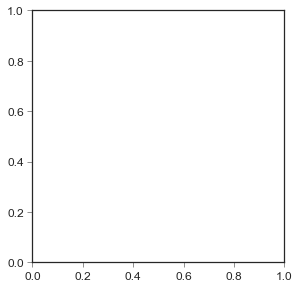

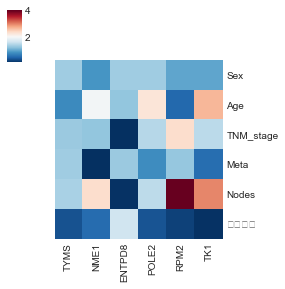

In [299]:
F='/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/嘧啶基因_临床指标_pvalue.txt'
DF=ReadTable(F)

plt.style.use('seaborn-white')
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0.2,0.2,0.7,0.7])
ax.tick_params(axis='y',length=6,width=0.5,labelsize=10,direction='out')
ax.tick_params(axis='x',length=6,width=0.5,labelsize=10,direction='out')
#Q_up_Z=Q_up.apply(scipy.stats.zscore,axis=1,result_type='broadcast')
fig=sns.clustermap(DF,figsize=(4,4),col_cluster=False,row_cluster=False,cmap='RdBu_r')  #center=0,vmin=-0.5,vmax=0.5,                  
plt.savefig('/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/嘧啶基因_临床指标_pvalue.pdf')
ax.tick_params(axis='x',length=5,width=0.5,labelsize=12,direction='out')
ax.tick_params(axis='y',length=5,width=0.5,labelsize=12,direction='out')
plt.show()

In [51]:
Ns=[i for i in list(RNA) if '-11' in i]
Norm=RNA[Ns]
Norm

TCGA-38-4625-11  TCGA-38-4626-11  TCGA-38-4627-11  \
GeneSymbol                                                      
FAM83A             4.642644         4.397002         1.885184   
COL11A1            0.806778         1.673240         1.387583   
CST1               1.086784         1.066675         1.054918   
AFAP1-AS1          5.430182         3.898837         2.414650   
CYP24A1            3.148625         6.678579         2.081612   
...                     ...              ...              ...   
ITLN2              9.202699         7.496015         8.440653   
AGER              15.756624        14.666529        14.938679   
CLDN18            14.314272        14.107544        13.501937   
SLC6A4            11.948064        12.127598        11.717891   
SFTPC             19.565433        18.824005        18.541981   

            TCGA-38-4632-11  TCGA-44-2655-11  TCGA-44-2657-11  \
GeneSymbol                                                      
FAM83A             3.122491         5.235413         4.570833   
COL11A1            0.000000         1.915903         3.630289   
CST1               0.973501         0.944484         2.473319   
AFAP1-AS1          1.967206         5.452391         5.397841   
CYP24A1            2.540548         4.875352         3.491173   
...                     ...              ...              ...   
ITLN2              7.259753         9.767982         9.251300   
AGER              14.011271        15.863138        15.129943   
CLDN18            14.136815        13.828533        14.317088   
SLC6A4             8.590520        10.902217        10.442954   
SFTPC             18.834542        18.988565        19.233116   

            TCGA-44-2661-11  TCGA-44-2662-11  TCGA-44-2665-11  \
GeneSymbol                                                      
FAM83A             3.390833         0.962882         3.279590   
COL11A1            7.837571         1.943996         7.628365   
CST1               8.570209         0.000000         2.048201   
AFAP1-AS1          2.746850         4.816154         3.687229   
CYP24A1            2.111432         0.000000         3.226878   
...                     ...              ...              ...   
ITLN2              9.517848         8.900809         9.115457   
AGER              15.996628        15.944293        15.568482   
CLDN18            14.687600        14.338472        14.518764   
SLC6A4            10.663763        12.322500         9.684663   
SFTPC             18.611486        19.466300        19.548387   

            TCGA-44-2668-11  ...  TCGA-55-6985-11  TCGA-55-6986-11  \
GeneSymbol                   ...                                     
FAM83A             4.308681  ...         5.870439         5.654857   
COL11A1            0.468844  ...         2.613555         1.511923   
CST1               1.546018  ...         3.385776         0.000000   
AFAP1-AS1          3.893304  ...         4.993253         3.838811   
CYP24A1            2.025808  ...         5.307352         5.260993   
...                     ...  ...              ...              ...   
ITLN2              6.462275  ...         8.441255         9.280743   
AGER              13.443759  ...        14.787107        15.842205   
CLDN18            13.995449  ...        13.207181        13.924117   
SLC6A4             8.258802  ...        10.491613        13.094672   
SFTPC             19.266915  ...        18.367022        17.454171   

            TCGA-73-4676-11  TCGA-91-6828-11  TCGA-91-6829-11  \
GeneSymbol                                                      
FAM83A             2.362694         6.644367         4.888982   
COL11A1            2.362694         2.893537         0.749920   
CST1               0.000000         0.000000         0.000000   
AFAP1-AS1          3.462942         3.579928         2.691556   
CYP24A1            2.578214         6.202982         2.347666   
...                     ...              ...              ...   
ITLN2              9.528468         8.60757

In [ ]:
#RRM2: 表达高 vs 表达低, DEGs, GOterm[与浸润的关系]

#找与RRM2共表达最高的Top10基因

In [28]:
F='./DataProcess/TN_RNAexp_log_data.txt'
RNA=ReadTable(F)

Ts=[i for i in list(RNA) if '-01' in i]
Tumor=RNA[Ts]

RNAT=Tumor.T


RNAT['分组']=np.where(RNAT['TK1']>=np.median(list(RNAT['TK1'])),'high','low')
High=RNAT[RNAT['分组']=='high']
Low=RNAT[RNAT['分组']=='low']

RAs=[i for i in list(High.index) if '-01' in i]
OAs=[i for i in list(Low.index) if '-01' in i]
#DFsum=RNA.apply(np.sum,axis=1)>1
#DFfilter=RNA[DFsum]
#print ('Filter GeneNmuber : ',len(DFfilter))
CountRA=RNA[RAs]
CountOA=RNA[OAs]
FDC=CountRA.apply(np.mean,axis=1)-CountOA.apply(np.mean,axis=1)
pval=pd.Series(scipy.stats.ttest_ind(CountRA,CountOA,axis=1)[1],index=CountRA.index)


/Users/ceci/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [4]:
RNA['FDC']=FDC
RNA['pval']=pval
RNA.head()

RNA_pval=RNA[RNA['pval']<=0.001]
RNA_DEG=RNA_pval[(RNA_pval['FDC']>1) | (RNA_pval['FDC']<-1)]
RNA_DEG.to_csv('/Users/ceci/Project/阿_/cBioPortal/DataProcess/DEGs/RRM2/RRM2_LUAD_DEGs.txt',sep='\t')
RNA_DEG_up=RNA_pval[RNA_pval['FDC']>1]
RNA_DEG_down=RNA_pval[RNA_pval['FDC']<-1]
#RNA_DEG_down

with open('/Users/ceci/Project/阿_/cBioPortal/DataProcess/DEGs/RRM2/RRM2_LUAD_DEGs_up.txt','a+') as f:
    for i in list(RNA_DEG_up.index):
        f.write('%s\n'%(i))
with open('/Users/ceci/Project/阿_/cBioPortal/DataProcess/DEGs/RRM2/RRM2_LUAD_DEGs_down.txt','a+') as f:
    for i in list(RNA_DEG_down.index):
        f.write('%s\n'%(i))


In [29]:
Low

GeneSymbol          FAM83A    COL11A1       CST1  AFAP1-AS1    CYP24A1  \
TCGA-05-4249-01  11.714512   4.614875   8.437881  11.380109   4.200512   
TCGA-05-4382-01   9.585804  12.436214   9.307702   6.899901   8.874422   
TCGA-05-4384-01  10.928578   2.221939   5.280741   7.618283  10.321432   
TCGA-05-4396-01  11.905000   5.281976   9.136450   4.085917   8.194205   
TCGA-05-4403-01  10.613301   6.848773   9.935629   5.282147   4.791236   
...                    ...        ...        ...        ...        ...   
TCGA-NJ-A55O-01   9.938349   3.790303   8.590516  10.331275   6.296389   
TCGA-NJ-A55R-01   7.594153   9.776949  10.018005  11.894727   7.195859   
TCGA-NJ-A7XG-01  10.437430   1.501668   6.982674   5.111286  10.171927   
TCGA-O1-A52J-01  10.050298   7.525552   8.309558  10.922220   4.261666   
TCGA-S2-AA1A-01   2.301939   7.375986  10.823861  11.418822   7.306034   

GeneSymbol           MMP11    ABCA12        CA9      MMP13  PPP1R14D  ...  \
TCGA-05-4249-01   9.503279  7.143363   6.978379  10.651527  8.587860  ...   
TCGA-05-4382-01  12.639696  7.505216   7.624620   6.555959  5.128508  ...   
TCGA-05-4384-01   8.437769  7.539895   2.055959   8.647897  6.542906  ...   
TCGA-05-4396-01   9.186117  8.171622   6.733327   3.440421  8.830141  ...   
TCGA-05-4403-01  12.530050  4.393464  10.004558   6.408693  5.348919  ...   
...                    ...       ...        ...        ...       ...  ...   
TCGA-NJ-A55O-01   9.820418  8.201957  11.849984   4.209680  5.610030  ...   
TCGA-NJ-A55R-01  11.341441  8.127886  11.825658   7.003939  7.828752  ...   
TCGA-NJ-A7XG-01   9.691921  7.868063   8.160361   7.632028  4.338638  ...   
TCGA-O1-A52J-01   6.750861  7.959115   5.896616   8.558715  3.191247  ...   
TCGA-S2-AA1A-01  11.204388  2.641916  11.612334   3.036873  5.570430  ...   

GeneSymbol            HBA1     FABP4  C13orf36       LGI3     ITLN2  \
TCGA-05-4249-01   2.079293  2.183169  1.702081   4.274373  2.077106   
TCGA-05-4382-01   5.692999  4.733653  0.000000   0.780646  1.284396   
TCGA-05-4384-01   8.472922  7.787348  4.128755   8.778064  5.567618   
TCGA-05-4396-01   0.000000  3.335969  0.000000   4.014623  1.331304   
TCGA-05-4403-01  10.380699  5.148658  2.990991   6.926664  5.329098   
...                    ...       ...       ...        ...       ...   
TCGA-NJ-A55O-01   6.077053  5.260763  4.066313   8.193353  6.026300   
TCGA-NJ-A55R-01   4.765052  6.057394  0.566182   2.537470  5.238917   
TCGA-NJ-A7XG-01   0.000000  1.247198  0.938022   2.889668  0.938022   
TCGA-O1-A52J-01   7.822469  2.407679  1.284159  11.622578  0.000000   
TCGA-S2-AA1A-01  10.969091  7.458915  0.000000   1.568324  1.568324   

GeneSymbol            AGER     CLDN18    SLC6A4      SFTPC   分组  
TCGA-05-4249-01   9.812076   8.674535  1.962586  11.239366  low  
TCGA-05-4382-01   7.074366   1.543199  5.026273   2.803764  low  
TCGA-05-4384-01  11.579726  11.211396  8.594179  15.437355  low  
TCGA-05-4396-01   5.607730   4.860546  1.711275   8.032343  low  
TCGA-05-4403-01  11.659711  14.893586  4.848042  14.847287  low  
...                    ...        ...       ...        ...  ...  
TCGA-NJ-A55O-01  12.766475  12.584812  5.426500  16.424419  low  
TCGA-NJ-A55R-01   7.205285   4.588996  2.043939  10.413512  low  
TCGA-NJ-A7XG-01   9.097416   5.086223  0.938022   9.253852  low  
TCGA-O1-A52J-01  11.929096  11.279152  1.952632  17.441080  low  
TCGA-S2-AA1A-01   9.808404  13.957329  1.856308   7.673210  low  

[255 rows x 20514 columns]

In [30]:
CybersortF='/Users/ceci/Project/阿_/cBioPortal/DataProcess/Cybersort/CIBERSORT.Output_Job16.txt'
Cybersort=ReadTable(CybersortF)
Cybersort

Norm_s=[i for i in list(Cybersort.index) if '-11' in i]
High_s=list(High.index)
Low_s=list(Low.index)

Norm=Cybersort.loc[Norm_s]
Norm['group']='Norm'
High=Cybersort.loc[High_s]
High['group']='High'
Low=Cybersort.loc[Low_s]
Low['group']='Low'

CybersortDF = pd.concat([Norm,Low, High], axis=0, join='inner')
CybersortDF.head()


B cells naive  B cells memory  Plasma cells  T cells CD8  \
Input Sample                                                                
TCGA-38-4625-11       0.019782             0.0      0.000000     0.066238   
TCGA-38-4626-11       0.008320             0.0      0.003755     0.071686   
TCGA-38-4627-11       0.009479             0.0      0.000000     0.049028   
TCGA-38-4632-11       0.011437             0.0      0.000000     0.062496   
TCGA-44-2655-11       0.018666             0.0      0.000000     0.059756   

                 T cells CD4 naive  T cells CD4 memory resting  \
Input Sample                                                     
TCGA-38-4625-11                0.0                    0.104232   
TCGA-38-4626-11                0.0                    0.075646   
TCGA-38-4627-11                0.0                    0.157176   
TCGA-38-4632-11                0.0                    0.102340   
TCGA-44-2655-11                0.0                    0.279209   

                 T cells CD4 memory activated  T cells follicular helper  \
Input Sample                                                               
TCGA-38-4625-11                      0.000000                   0.028613   
TCGA-38-4626-11                      0.001440                   0.017838   
TCGA-38-4627-11                      0.000000                   0.000000   
TCGA-38-4632-11                      0.010407                   0.000000   
TCGA-44-2655-11                      0.000000                   0.088367   

                 T cells regulatory (Tregs)  T cells gamma delta  ...  \
Input Sample                                                      ...   
TCGA-38-4625-11                    0.000000                  0.0  ...   
TCGA-38-4626-11                    0.010563                  0.0  ...   
TCGA-38-4627-11                    0.000000                  0.0  ...   
TCGA-38-4632-11                    0.000000                  0.0  ...   
TCGA-44-2655-11                    0.000000                  0.0  ...   

                 Dendritic cells resting  Dendritic cells activated  \
Input Sample                                                          
TCGA-38-4625-11                 0.000000                   0.035025   
TCGA-38-4626-11                 0.000000                   0.014359   
TCGA-38-4627-11                 0.000000                   0.043379   
TCGA-38-4632-11                 0.000000                   0.076170   
TCGA-44-2655-11                 0.009093                   0.002170   

                 Mast cells resting  Mast cells activated  Eosinophils  \
Input Sample                                                             
TCGA-38-4625-11            0.115791              0.000000     0.005870   
TCGA-38-4626-11            0.000000              0.017587     0.010192   
TCGA-38-4627-11            0.097077              0.000000     0.000000   
TCGA-38-4632-11            0.066863              0.000000     0.000000   
TCGA-44-2655-11            0.189652              0.000000     0.016005   

                 Neutrophils  P-value  Pearson Correlation      RMSE  group  
Input Sample                                                                 
TCGA-38-4625-11     0.043892     0.02             0.271465  0.980179   Norm  
TCGA-38-4626-11     0.029568     0.00             0.315161  0.981064   Norm  
TCGA-38-4627-11     0.007066     0.00             0.355272  0.939616   Norm  
TCGA-38-4632-11     0.043958     0.00             0.441133  0.897989   Norm  
TCGA-44-2655-11     0.007755     0.09             0.121006  1.037438   Norm  

[5 rows x 26 columns]

In [31]:

CybersortDF_mean=CybersortDF.groupby('group').mean()
CybersortDF_mean

del CybersortDF_mean['P-value']
del CybersortDF_mean['Pearson Correlation']
del CybersortDF_mean['RMSE']

CybersortDF_mean

B cells naive  B cells memory  Plasma cells  T cells CD8  \
group                                                             
High        0.029959        0.012026      0.057506     0.062206   
Low         0.038320        0.034024      0.059668     0.048677   
Norm        0.016262        0.008112      0.010317     0.062764   

       T cells CD4 naive  T cells CD4 memory resting  \
group                                                  
High            0.000000                    0.123721   
Low             0.000005                    0.146610   
Norm            0.000000                    0.171018   

       T cells CD4 memory activated  T cells follicular helper  \
group                                                            
High                       0.009315                   0.075687   
Low                        0.004066                   0.067204   
Norm                       0.001257                   0.021562   

       T cells regulatory (Tregs)  T cells gamma delta  ...  Monocytes  \
group                                                   ...              
High                     0.034374             0.000065  ...   0.016410   
Low                      0.029022             0.000708  ...   0.023500   
Norm                     0.002422             0.000000  ...   0.072334   

       Macrophages M0  Macrophages M1  Macrophages M2  \
group                                                   
High         0.165352        0.062164        0.208636   
Low          0.127863        0.043649        0.217936   
Norm         0.169290        0.025911        0.204128   

       Dendritic cells resting  Dendritic cells activated  Mast cells resting  \
group                                                                           
High                  0.012930                   0.034936            0.043260   
Low                   0.025190                   0.031476            0.059607   
Norm                  0.004904                   0.030569            0.094045   

       Mast cells activated  Eosinophils  Neutrophils  
group                                                  
High               0.002266     0.000059     0.006725  
Low                0.001190     0.000143     0.005970  
Norm               0.004999     0.007021     0.030224  

[3 rows x 22 columns]

AttributeError: 'FacetGrid' object has no attribute 'tick_params'

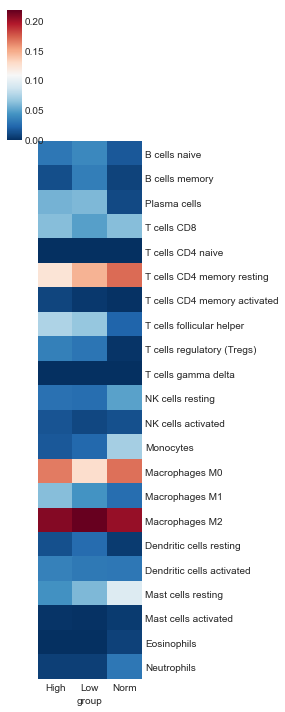

In [32]:
plt.style.use('seaborn-white')
#fig=plt.figure(figsize=(20,3))
#ax=fig.add_axes([0.2,0.2,0.7,0.7])
#ax.tick_params(axis='y',length=6,width=0.5,labelsize=10,direction='out')
#ax.tick_params(axis='x',length=6,width=0.5,labelsize=10,direction='out')
#Q_up_Z=Q_up.apply(scipy.stats.zscore,axis=1,result_type='broadcast')
CybersortDF_meanT=CybersortDF_mean.T
fig=sns.clustermap(CybersortDF_meanT,figsize=(4,10),col_cluster=False,row_cluster=False,cmap='RdBu_r')  #center=0,vmin=-0.5,vmax=0.5,                  
#plt.savefig('/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/嘧啶基因_临床指标_pvalue.pdf')
ax.tick_params(axis='x',length=5,width=0.5,labelsize=12,direction='out')
ax.tick_params(axis='y',length=5,width=0.5,labelsize=12,direction='out')
plt.show()

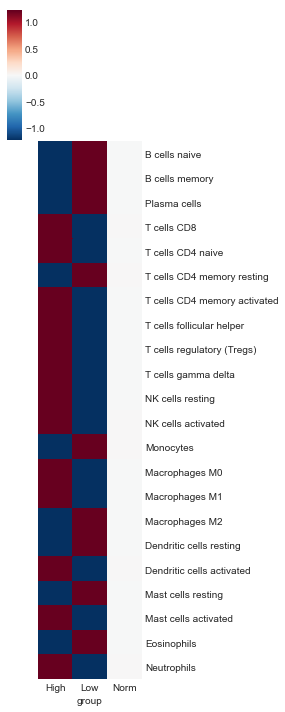

In [23]:
plt.style.use('seaborn-white')
#fig=plt.figure(figsize=(20,3))
#ax=fig.add_axes([0.2,0.2,0.7,0.7])
#ax.tick_params(axis='y',length=6,width=0.5,labelsize=10,direction='out')
#ax.tick_params(axis='x',length=6,width=0.5,labelsize=10,direction='out')
#Q_up_Z=Q_up.apply(scipy.stats.zscore,axis=1,result_type='broadcast')
CybersortDF_meanT=CybersortDF_mean.T
CybersortDF_meanT_Z=CybersortDF_meanT.apply(scipy.stats.zscore,axis=1,result_type='broadcast')
fig=sns.clustermap(CybersortDF_meanT_Z,figsize=(4,10),col_cluster=False,row_cluster=False,cmap='RdBu_r')  #center=0,vmin=-0.5,vmax=0.5,                  
#plt.savefig('/Users/ceci/Project/阿_/cBioPortal/DataProcess/KMsurvival/嘧啶基因_临床指标_pvalue.pdf')
ax.tick_params(axis='x',length=5,width=0.5,labelsize=12,direction='out')
ax.tick_params(axis='y',length=5,width=0.5,labelsize=12,direction='out')
plt.show()

In [33]:
CybersortDF_meanT

group                             High       Low      Norm
B cells naive                 0.029959  0.038320  0.016262
B cells memory                0.012026  0.034024  0.008112
Plasma cells                  0.057506  0.059668  0.010317
T cells CD8                   0.062206  0.048677  0.062764
T cells CD4 naive             0.000000  0.000005  0.000000
T cells CD4 memory resting    0.123721  0.146610  0.171018
T cells CD4 memory activated  0.009315  0.004066  0.001257
T cells follicular helper     0.075687  0.067204  0.021562
T cells regulatory (Tregs)    0.034374  0.029022  0.002422
T cells gamma delta           0.000065  0.000708  0.000000
NK cells resting              0.027618  0.025784  0.050023
NK cells activated            0.014785  0.009393  0.012838
Monocytes                     0.016410  0.023500  0.072334
Macrophages M0                0.165352  0.127863  0.169290
Macrophages M1                0.062164  0.043649  0.025911
Macrophages M2                0.208636  0.217936  0.204128
Dendritic cells resting       0.012930  0.025190  0.004904
Dendritic cells activated     0.034936  0.031476  0.030569
Mast cells resting            0.043260  0.059607  0.094045
Mast cells activated          0.002266  0.001190  0.004999
Eosinophils                   0.000059  0.000143  0.007021
Neutrophils                   0.006725  0.005970  0.030224

In [35]:
CybersortDF_mean.to_csv('/Users/ceci/Project/阿_/cBioPortal/DataProcess/Cybersort/CIBERSORT_logOddsratio_TK1.txt',sep='\t')

No handles with labels found to put in legend.


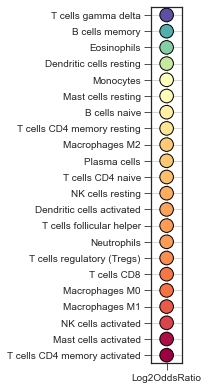

In [39]:
F='/Users/ceci/Project/阿_/cBioPortal/DataProcess/Cybersort/CIBERSORT_logOddsratio_TK1.txt'
DF=ReadTable(F)
DF

DFs=DF['Log2OddsRatio'].to_frame()
#散点图
Sample=list(DFs)
y=[1+i for i in range(len(DFs))]
x=[1+i for i in range(len(list(DFs)))]
Ylim=[0.5,y[-1]+0.5]
Xlim=[0.5,1.5]
X=[]
Y=[]
C=[]
Header=list(DFs)
for i in range(len(list(DFs))):
    Col=Header[i]
    C=C+list(DFs[Col])
    X=X+[1+i]*len(DFs)
    Y=Y+y
plt.style.use('seaborn-white')
fig=plt.figure(figsize=(0.85,5.5))
ax=fig.add_axes([0.3,0.08,0.5,0.9])
ax.set_xlim(Xlim)
ax.set_ylim(Ylim)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(list(DFs),rotation=0)
ax.set_yticklabels(list(DFs.index))
ax.scatter(X,Y,c=C,cmap='Spectral_r',s=185,alpha=1,vmin=-2,vmax=1,edgecolors='black')
ax.grid(which='minor', axis='y', linewidth=0.75, linestyle='-', color='white')
ax.tick_params(axis='y',length=7,labelsize=10,direction='out')
ax.tick_params(axis='x',length=7,labelsize=10,direction='out')
ax.legend()
ax.grid(True)
outfig='/Users/ceci/Project/阿_/cBioPortal/DataProcess/Cybersort/CIBERSORT_logOddsratio_TK1.pdf'
plt.savefig(outfig)

plt.show()  

# Ecotyper-微环境生态型

In [80]:
F='./DataProcess/Ecotyper/ecotyper_output/Carcinoma_Ecotypes/Ecotype_Abundance.txt'
DF=ReadTable(F)
DF=DF.T
DF.head()



ID   TCGA-38-4625-11_Norm  TCGA-38-4626-11_Norm  TCGA-38-4627-11_Norm  \
CE1              0.023274              0.027979              0.087961   
CE2              0.043376              0.055277              0.027682   
CE3              0.197135              0.290321              0.187360   
CE4              0.139292              0.109372              0.074310   
CE5              0.041000              0.022277              0.031508   

ID   TCGA-38-4632-11_Norm  TCGA-44-2655-11_Norm  TCGA-44-2657-11_Norm  \
CE1              0.045313              0.040269              0.030173   
CE2              0.028616              0.025837              0.035540   
CE3              0.237831              0.123647              0.118421   
CE4              0.059071              0.067261              0.062205   
CE5              0.031395              0.082305              0.082540   

ID   TCGA-44-2661-11_Norm  TCGA-44-2662-11_Norm  TCGA-44-2665-11_Norm  \
CE1              0.115516              0.070715              0.102486   
CE2              0.029669              0.023231              0.023573   
CE3              0.135302              0.209469              0.188777   
CE4              0.079809              0.070934              0.059794   
CE5              0.068392              0.036275              0.065264   

ID   TCGA-44-2668-11_Norm  ...  TCGA-MP-A4T4-01_High  TCGA-MP-A4T7-01_High  \
CE1              0.071655  ...              0.179082              0.010405   
CE2              0.056384  ...              0.147480              0.189680   
CE3              0.268531  ...              0.059905              0.146915   
CE4              0.066018  ...              0.074323              0.142878   
CE5              0.029101  ...              0.063364              0.094329   

ID   TCGA-MP-A4T8-01_High  TCGA-MP-A4T9-01_High  TCGA-MP-A4TA-01_High  \
CE1              0.218369              0.142130              0.042130   
CE2              0.199213              0.180464              0.218444   
CE3              0.005082              0.091195              0.047604   
CE4              0.143650              0.125934              0.155729   
CE5              0.127467              0.102171              0.160333   

ID   TCGA-MP-A4TC-01_High  TCGA-MP-A4TF-01_High  TCGA-MP-A4TI-01_High  \
CE1              0.403747              0.055763              0.220038   
CE2              0.177595              0.250115              0.116211   
CE3              0.065843              0.023171              0.116985   
CE4              0.066446              0.149941              0.062783   
CE5              0.064330              0.087180              0.044406   

ID   TCGA-MP-A4TK-01_High  TCGA-NJ-A4YQ-01_High  
CE1              0.278089              0.048069  
CE2              0.103751              0.045217  
CE3              0.083710              0.032338  
CE4              0.108281              0.068206  
CE5              0.098777              0.093087  

[5 rows x 569 columns]

# ColorDF

In [81]:
Samples=list(DF)
len(Samples)

569

In [82]:
Samples=list(DF)
#NSamples=[i for i in Samples if 'nor' in i]
#AAHSamples=[i for i in Samples if ('AAH' in i) and ('N' not in i)]
#AISSamples=[i for i in Samples if ('ais' in i) and ('N' not in i)]
#INVSamples=[i for i in Samples if ('inv' in i) and ('N' not in i)]
#ADCSamples=[i for i in Samples if ('ADC' in i) and ('N' not in i)]

State=[]
StateC=[]

for i in Samples:
    if 'Norm' in i:
        StateC.append('#2E828C')
        State.append('Norm')
    if ('Low' in i):
        StateC.append('#D9D768')
        State.append('Low')
    if ('High' in i):
        StateC.append('#8C2728')
        State.append('High')

ColorDF=pd.DataFrame({'State':StateC} ,index=Samples)
ColorDF

State
TCGA-38-4625-11_Norm  #2E828C
TCGA-38-4626-11_Norm  #2E828C
TCGA-38-4627-11_Norm  #2E828C
TCGA-38-4632-11_Norm  #2E828C
TCGA-44-2655-11_Norm  #2E828C
...                       ...
TCGA-MP-A4TC-01_High  #8C2728
TCGA-MP-A4TF-01_High  #8C2728
TCGA-MP-A4TI-01_High  #8C2728
TCGA-MP-A4TK-01_High  #8C2728
TCGA-NJ-A4YQ-01_High  #8C2728

[569 rows x 1 columns]

# Heatmap

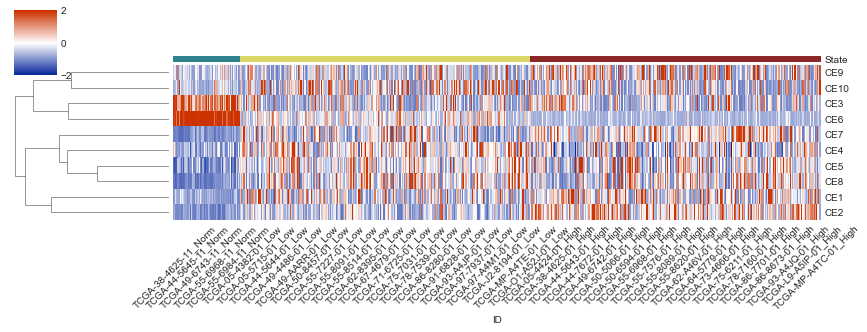

In [83]:
#plot
import matplotlib
colorslist = ['#002299','white','#CC3300']
cmaps = matplotlib.colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=800)
DF_Z =DF.apply(scipy.stats.zscore,axis=1,result_type='broadcast')
#fig=sns.clustermap(DF_Z,cmap=cmaps,center=0,vmin=-2, vmax=2,method='complete',metric='euclidean',figsize=(10,8),col_colors=ColorDF,row_cluster=True,col_cluster=False,linecolor=None)
fig=sns.clustermap(DF_Z,cmap=cmaps,center=0,vmin=-2, vmax=2,figsize=(12,5),col_colors=ColorDF,row_cluster=True,col_cluster=False,linecolor=None)
plt.setp(fig.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=45, fontsize=10)
plt.savefig('./DataProcess/Ecotyper/ecotyper_output/Carcinoma_Ecotypes/Ecotype_Abundance_Heatmap.pdf',dpi=100)
plt.show()



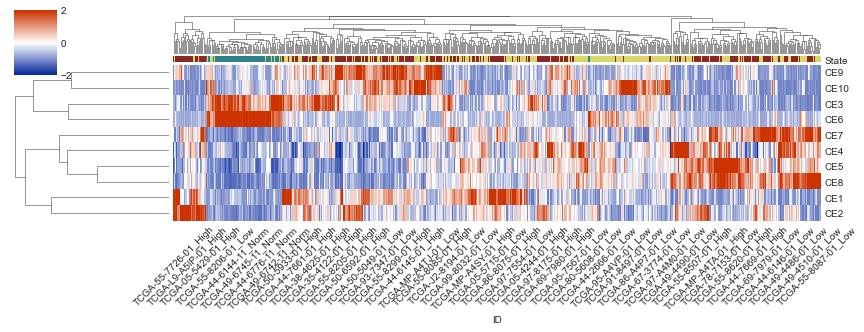

In [84]:
#plot
import matplotlib
colorslist = ['#002299','white','#CC3300']
cmaps = matplotlib.colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=800)
DF_Z =DF.apply(scipy.stats.zscore,axis=1,result_type='broadcast')
#fig=sns.clustermap(DF_Z,cmap=cmaps,center=0,vmin=-2, vmax=2,method='complete',metric='euclidean',figsize=(10,8),col_colors=ColorDF,row_cluster=True,col_cluster=False,linecolor=None)
fig=sns.clustermap(DF_Z,cmap=cmaps,center=0,vmin=-2, vmax=2,figsize=(12,5),col_colors=ColorDF,row_cluster=True,col_cluster=True,linecolor=None)
plt.setp(fig.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=45, fontsize=10)
plt.savefig('./DataProcess/Ecotyper/ecotyper_output/Carcinoma_Ecotypes/Ecotype_Abundance_Heatmap2.pdf',dpi=100)
plt.show()



In [85]:
DF=DF.T
DF.head()

CE1       CE2       CE3       CE4       CE5  \
ID                                                                       
TCGA-38-4625-11_Norm  0.023274  0.043376  0.197135  0.139292  0.041000   
TCGA-38-4626-11_Norm  0.027979  0.055277  0.290321  0.109372  0.022277   
TCGA-38-4627-11_Norm  0.087961  0.027682  0.187360  0.074310  0.031508   
TCGA-38-4632-11_Norm  0.045313  0.028616  0.237831  0.059071  0.031395   
TCGA-44-2655-11_Norm  0.040269  0.025837  0.123647  0.067261  0.082305   

                           CE6       CE7       CE8       CE9      CE10  
ID                                                                      
TCGA-38-4625-11_Norm  0.440337  0.014366  0.020692  0.049618  0.030908  
TCGA-38-4626-11_Norm  0.365878  0.012249  0.023148  0.064885  0.028614  
TCGA-38-4627-11_Norm  0.464534  0.014076  0.003240  0.068340  0.040989  
TCGA-38-4632-11_Norm  0.300795  0.018634  0.008859  0.170093  0.099393  
TCGA-44-2655-11_Norm  0.583809  0.012449  0.032448  0.009570  0.022404

In [95]:
#DF['max_idx'] = DF.idxmax(axis=1)
#DF['max_val'] = DF.max(axis=1)


DF['group']=list(DF.index)
Norm=[i for i in list(DF['group']) if 'Norm' in i]
High=[i for i in list(DF['group']) if 'High' in i]
Low=[i for i in list(DF['group']) if 'Low' in i]


DF_Norm=DF.loc[Norm]
DF_Low=DF.loc[Low]
DF_High=DF.loc[High]

len(Norm)

59

In [102]:
print ('Norm:')
for i in ['CE1','CE2','CE3','CE4','CE5','CE6','CE7','CE8','CE9','CE10']:
    CE=DF_Norm[DF_Norm['max_idx']==i]
    print (i, len(CE))

print (' ')
print ('Low:')
for i in ['CE1','CE2','CE3','CE4','CE5','CE6','CE7','CE8','CE9','CE10']:
    CE=DF_Low[DF_Low['max_idx']==i]
    print (i, len(CE))

print (' ')
print ('High:')
for i in ['CE1','CE2','CE3','CE4','CE5','CE6','CE7','CE8','CE9','CE10']:
    CE=DF_High[DF_High['max_idx']==i]
    print (i, len(CE))

Norm:
CE1 0
CE2 0
CE3 0
CE4 0
CE5 0
CE6 59
CE7 0
CE8 0
CE9 0
CE10 0
 
Low:
CE1 51
CE2 5
CE3 9
CE4 8
CE5 8
CE6 51
CE7 6
CE8 62
CE9 8
CE10 47
 
High:
CE1 54
CE2 50
CE3 10
CE4 8
CE5 17
CE6 2
CE7 12
CE8 49
CE9 40
CE10 13


# 细胞比例(cibersort)与RRM2表达量的相关性

In [178]:
F1='./DataProcess/Cybersort/CIBERSORT.Output_Job16.txt'
DF1=ReadTable(F1)
DF1.head()

B cells naive  B cells memory  Plasma cells  T cells CD8  \
Input Sample                                                                
TCGA-05-4244-01       0.000000        0.000000      0.078423     0.000000   
TCGA-05-4249-01       0.000000        0.073116      0.016946     0.008518   
TCGA-05-4250-01       0.012498        0.000000      0.001048     0.106357   
TCGA-05-4382-01       0.020059        0.000000      0.035729     0.043678   
TCGA-05-4384-01       0.000000        0.000000      0.054992     0.048182   

                 T cells CD4 naive  T cells CD4 memory resting  \
Input Sample                                                     
TCGA-05-4244-01                0.0                    0.145684   
TCGA-05-4249-01                0.0                    0.095266   
TCGA-05-4250-01                0.0                    0.154729   
TCGA-05-4382-01                0.0                    0.135003   
TCGA-05-4384-01                0.0                    0.129574   

                 T cells CD4 memory activated  T cells follicular helper  \
Input Sample                                                               
TCGA-05-4244-01                      0.000000                   0.073423   
TCGA-05-4249-01                      0.000000                   0.064591   
TCGA-05-4250-01                      0.053221                   0.083150   
TCGA-05-4382-01                      0.002526                   0.020117   
TCGA-05-4384-01                      0.000000                   0.052181   

                 T cells regulatory (Tregs)  T cells gamma delta  ...  \
Input Sample                                                      ...   
TCGA-05-4244-01                    0.002808                  0.0  ...   
TCGA-05-4249-01                    0.031039                  0.0  ...   
TCGA-05-4250-01                    0.017560                  0.0  ...   
TCGA-05-4382-01                    0.048421                  0.0  ...   
TCGA-05-4384-01                    0.021146                  0.0  ...   

                 Macrophages M2  Dendritic cells resting  \
Input Sample                                               
TCGA-05-4244-01        0.256527                 0.064163   
TCGA-05-4249-01        0.224233                 0.224517   
TCGA-05-4250-01        0.346022                 0.000000   
TCGA-05-4382-01        0.390308                 0.000000   
TCGA-05-4384-01        0.374657                 0.000000   

                 Dendritic cells activated  Mast cells resting  \
Input Sample                                                     
TCGA-05-4244-01                   0.043404            0.055792   
TCGA-05-4249-01                   0.020708            0.130038   
TCGA-05-4250-01                   0.055989            0.031803   
TCGA-05-4382-01                   0.000000            0.000000   
TCGA-05-4384-01                   0.008265            0.042050   

                 Mast cells activated  Eosinophils  Neutrophils  P-value  \
Input Sample                                                               
TCGA-05-4244-01                   0.0     0.000000     0.000100     0.11   
TCGA-05-4249-01                   0.0     0.000000     0.021071     0.02   
TCGA-05-4250-01                   0.0     0.000000     0.010498     0.06   
TCGA-05-4382-01                   0.0     0.000000     0.004636     0.00   
TCGA-05-4384-01                   0.0     0.003398     0.010004     0.08   

                 Pearson Correlation      RMSE  
Input Sample                                    
TCGA-05-4244-01             0.093561  1.049699  
TCGA-05-4249-01             0.277047  0.967677  
TCGA-05-4250-01             0.198419  1.008524  
TCGA-05-4382-01             0.347021  0.949313  
TCGA-05-4384-01             0.128646  1.045086  

[5 rows x 25 columns]

In [179]:
F2='./DataProcess/TN_RNAexp_log_data.txt'
DF2=ReadTable(F2)
DF2=DF2.T
DF2=DF2.loc[list(DF1.index)]
DF2.head()

GeneSymbol          FAM83A    COL11A1      CST1  AFAP1-AS1    CYP24A1  \
TCGA-05-4244-01  10.853606   7.092112  7.738660  11.476493   8.382252   
TCGA-05-4249-01  11.714512   4.614875  8.437881  11.380109   4.200512   
TCGA-05-4250-01  11.968058  10.593288  4.385120  11.833329   9.943738   
TCGA-05-4382-01   9.585804  12.436214  9.307702   6.899901   8.874422   
TCGA-05-4384-01  10.928578   2.221939  5.280741   7.618283  10.321432   

GeneSymbol           MMP11    ABCA12       CA9      MMP13   PPP1R14D  ...  \
TCGA-05-4244-01   8.851040  8.922320  4.168786   8.488427   7.638595  ...   
TCGA-05-4249-01   9.503279  7.143363  6.978379  10.651527   8.587860  ...   
TCGA-05-4250-01  11.761044  9.605937  9.043052   7.317422  11.202920  ...   
TCGA-05-4382-01  12.639696  7.505216  7.624620   6.555959   5.128508  ...   
TCGA-05-4384-01   8.437769  7.539895  2.055959   8.647897   6.542906  ...   

GeneSymbol          GPM6A      HBA1     FABP4  C13orf36      LGI3     ITLN2  \
TCGA-05-4244-01  5.956229  1.053181  6.851687  2.375401  4.608082  3.174502   
TCGA-05-4249-01  3.498583  2.079293  2.183169  1.702081  4.274373  2.077106   
TCGA-05-4250-01  6.582487  4.809486  4.314755  0.733962  4.385120  1.218099   
TCGA-05-4382-01  0.968791  5.692999  4.733653  0.000000  0.780646  1.284396   
TCGA-05-4384-01  7.000699  8.472922  7.787348  4.128755  8.778064  5.567618   

GeneSymbol            AGER     CLDN18    SLC6A4      SFTPC  
TCGA-05-4244-01  10.066493   8.921282  5.679936  12.383388  
TCGA-05-4249-01   9.812076   8.674535  1.962586  11.239366  
TCGA-05-4250-01   8.143914   8.432646  2.800890  11.753722  
TCGA-05-4382-01   7.074366   1.543199  5.026273   2.803764  
TCGA-05-4384-01  11.579726  11.211396  8.594179  15.437355  

[5 rows x 20513 columns]

In [180]:
DF1['RRM2']=DF2['RRM2']
DF1['TK1']=DF2['TK1']
DF1.head()

B cells naive  B cells memory  Plasma cells  T cells CD8  \
Input Sample                                                                
TCGA-05-4244-01       0.000000        0.000000      0.078423     0.000000   
TCGA-05-4249-01       0.000000        0.073116      0.016946     0.008518   
TCGA-05-4250-01       0.012498        0.000000      0.001048     0.106357   
TCGA-05-4382-01       0.020059        0.000000      0.035729     0.043678   
TCGA-05-4384-01       0.000000        0.000000      0.054992     0.048182   

                 T cells CD4 naive  T cells CD4 memory resting  \
Input Sample                                                     
TCGA-05-4244-01                0.0                    0.145684   
TCGA-05-4249-01                0.0                    0.095266   
TCGA-05-4250-01                0.0                    0.154729   
TCGA-05-4382-01                0.0                    0.135003   
TCGA-05-4384-01                0.0                    0.129574   

                 T cells CD4 memory activated  T cells follicular helper  \
Input Sample                                                               
TCGA-05-4244-01                      0.000000                   0.073423   
TCGA-05-4249-01                      0.000000                   0.064591   
TCGA-05-4250-01                      0.053221                   0.083150   
TCGA-05-4382-01                      0.002526                   0.020117   
TCGA-05-4384-01                      0.000000                   0.052181   

                 T cells regulatory (Tregs)  T cells gamma delta  ...  \
Input Sample                                                      ...   
TCGA-05-4244-01                    0.002808                  0.0  ...   
TCGA-05-4249-01                    0.031039                  0.0  ...   
TCGA-05-4250-01                    0.017560                  0.0  ...   
TCGA-05-4382-01                    0.048421                  0.0  ...   
TCGA-05-4384-01                    0.021146                  0.0  ...   

                 Dendritic cells activated  Mast cells resting  \
Input Sample                                                     
TCGA-05-4244-01                   0.043404            0.055792   
TCGA-05-4249-01                   0.020708            0.130038   
TCGA-05-4250-01                   0.055989            0.031803   
TCGA-05-4382-01                   0.000000            0.000000   
TCGA-05-4384-01                   0.008265            0.042050   

                 Mast cells activated  Eosinophils  Neutrophils  P-value  \
Input Sample                                                               
TCGA-05-4244-01                   0.0     0.000000     0.000100     0.11   
TCGA-05-4249-01                   0.0     0.000000     0.021071     0.02   
TCGA-05-4250-01                   0.0     0.000000     0.010498     0.06   
TCGA-05-4382-01                   0.0     0.000000     0.004636     0.00   
TCGA-05-4384-01                   0.0     0.003398     0.010004     0.08   

                 Pearson Correlation      RMSE       RRM2        TK1  
Input Sample                                                          
TCGA-05-4244-01             0.093561  1.049699  10.519774  10.720552  
TCGA-05-4249-01             0.277047  0.967677   7.917814   8.493071  
TCGA-05-4250-01             0.198419  1.008524  11.482798  12.162999  
TCGA-05-4382-01             0.347021  0.949313   9.197942   9.701034  
TCGA-05-4384-01             0.128646  1.045086   7.883780   7.783352  

[5 rows x 27 columns]

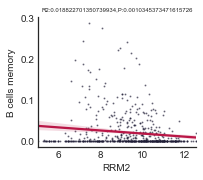

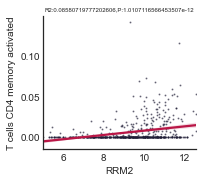

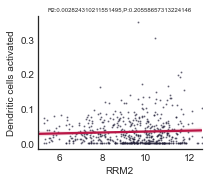

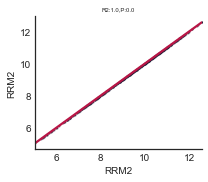

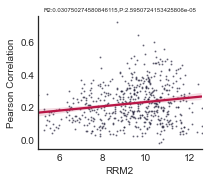

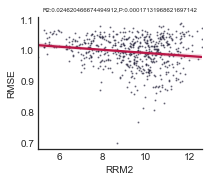

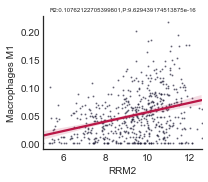

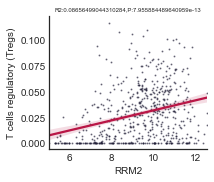

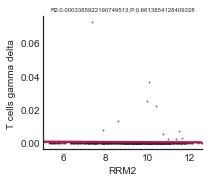

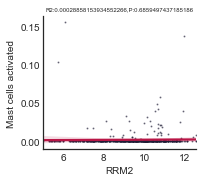

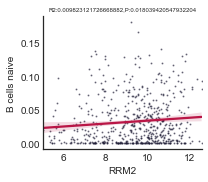

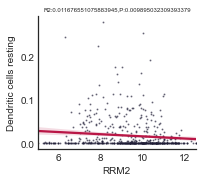

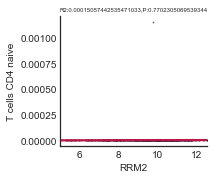

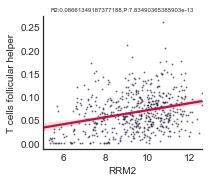

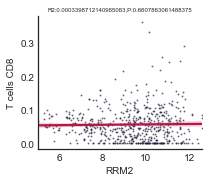

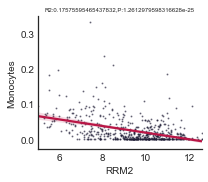

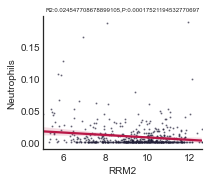

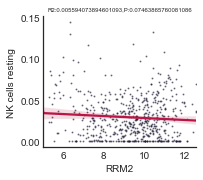

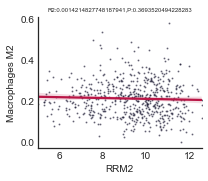

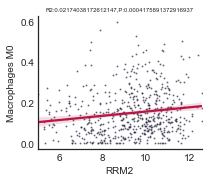

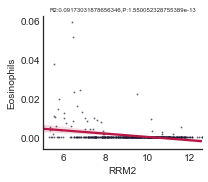

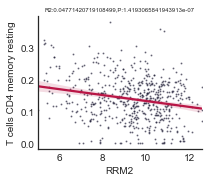

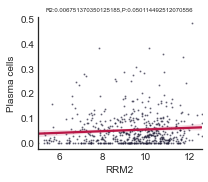

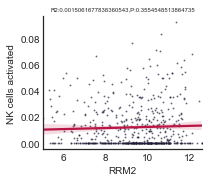

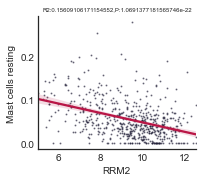

In [184]:
ClusterN='RRM2'
#dataF='/Users/huangbeibei/Desktop/RAvsOA_noextend/Batch23/ATACseq/Monocytes/DiffPeaks/mean3_fc2_p0.001_fdr0.1/KmeansCluster/kvalue_k3/RAheterogeneity/clinical/clinical_v1.txt'
Data=DF1.copy()
X='{}'.format(ClusterN)
#Y=['ESR','CRP','RF','ACCP','TSS','Reads','TCJ','SCJ','Pain','DAS28_ESR4','DAS28_CRP4','DAS28_ESR3','DAS28_CRP3']
#Y=['CRP']
Y=['B cells memory',
 'T cells CD4 memory activated',
 'Dendritic cells activated',
 'RRM2',
 'Pearson Correlation',
 'RMSE',
 'Macrophages M1',
 'T cells regulatory (Tregs)',
 'T cells gamma delta',
 'Mast cells activated',
 'B cells naive',
 'Dendritic cells resting',
 'T cells CD4 naive',
 'T cells follicular helper',
 'T cells CD8',
 'Monocytes',
 'Neutrophils',
 'NK cells resting',
 'Macrophages M2',
 'Macrophages M0',
 'Eosinophils',
 'T cells CD4 memory resting',
 'Plasma cells',
 'NK cells activated',
 'Mast cells resting']

Data.sort_values(by=[X], inplace=True)
for i in Y:
    import statsmodels.api as sm
    DataN=Data.dropna(axis = 0, subset = [i] )
    
    XX=DataN[X]
    YY=DataN[i]
    XX=sm.add_constant(XX)
    est1 = sm.OLS(YY,XX).fit()
    
    #拟合Y值
    y_fitted = est1.fittedvalues
    #fig, ax = plt.subplots(figsize=(8,6))
    #ax.plot(DataN[X], DataN[i], 'o', label='data')
    #ax.plot(DataN[X], y_fitted, 'r--.',label='OLS')
    #ax.legend(loc='best')
    
    #sns.set_style('ticks')

    ax=sns.lmplot(x=X, y=i,ci=95,data=Data,height=2.5,aspect=1.2,markers='o',line_kws={'color': '#B91646'},scatter_kws={"s": 1, "alpha": 0.5,'color': '#1F1D36'})


    #ax=sns.lmplot(x=X, y=i,ci=95,data=Data,height=2,fit_reg=True,aspect=1.2,markers='o',line_kws={'color': 'black'},scatter_kws={"s": 3, "alpha": 0.55,'color': 'black'})
    plt.title('R2:{},P:{}'.format(est1.rsquared,est1.pvalues[1]), fontsize=6)
    #print (est1.pvalues)
    plt.savefig('./DataProcess/Cybersort/Correlation_RRM2/{}_vs_{}.OLS.pdf'.format(ClusterN,i))
    plt.show()

    #print est1.summary()
    #print (est1.rsquared)
    
    


# H_H与其他组别差异分析

In [40]:
F='./DataProcess/TN_RNAexp_log_data.txt'
RNA=ReadTable(F)
RNA.head()

TCGA-05-4244-01  TCGA-05-4249-01  TCGA-05-4250-01  \
GeneSymbol                                                      
FAM83A            10.853606        11.714512        11.968058   
COL11A1            7.092112         4.614875        10.593288   
CST1               7.738660         8.437881         4.385120   
AFAP1-AS1         11.476493        11.380109        11.833329   
CYP24A1            8.382252         4.200512         9.943738   

            TCGA-05-4382-01  TCGA-05-4384-01  TCGA-05-4389-01  \
GeneSymbol                                                      
FAM83A             9.585804        10.928578        10.564550   
COL11A1           12.436214         2.221939         6.799644   
CST1               9.307702         5.280741        14.265710   
AFAP1-AS1          6.899901         7.618283        10.728414   
CYP24A1            8.874422        10.321432         8.345010   

            TCGA-05-4390-01  TCGA-05-4395-01  TCGA-05-4396-01  \
GeneSymbol                                                      
FAM83A            12.290808        15.095562        11.905000   
COL11A1           10.823582         8.357376         5.281976   
CST1               6.425313         2.543966         9.136450   
AFAP1-AS1         10.578722         3.097493         4.085917   
CYP24A1            9.606481        14.016861         8.194205   

            TCGA-05-4397-01  ...  TCGA-55-6985-11  TCGA-55-6986-11  \
GeneSymbol                   ...                                     
FAM83A             8.288409  ...         5.870439         5.654857   
COL11A1            7.022246  ...         2.613555         1.511923   
CST1               2.844868  ...         3.385776         0.000000   
AFAP1-AS1          2.935969  ...         4.993253         3.838811   
CYP24A1            0.527771  ...         5.307352         5.260993   

            TCGA-73-4676-11  TCGA-91-6828-11  TCGA-91-6829-11  \
GeneSymbol                                                      
FAM83A             2.362694         6.644367         4.888982   
COL11A1            2.362694         2.893537         0.749920   
CST1               0.000000         0.000000         0.000000   
AFAP1-AS1          3.462942         3.579928         2.691556   
CYP24A1            2.578214         6.202982         2.347666   

            TCGA-91-6831-11  TCGA-91-6835-11  TCGA-91-6836-11  \
GeneSymbol                                                      
FAM83A             1.077175         6.756196         3.262208   
COL11A1            1.077175         2.428705         3.139666   
CST1               0.000000         5.584142         0.000000   
AFAP1-AS1          2.711363         3.197425         5.300186   
CYP24A1            0.000000         4.957102         3.985956   

            TCGA-91-6847-11  TCGA-91-6849-11  
GeneSymbol                                    
FAM83A             4.185438         4.775909  
COL11A1            1.893323         3.660541  
CST1               0.000000         0.000000  
AFAP1-AS1          3.332980         2.504290  
CYP24A1            5.640066         5.397365  

[5 rows x 569 columns]

In [45]:
GroupF='./DataProcess/DEGs_2Genes/Group_info.txt'
Group=ReadTable(GroupF)

H_H_s=list(Group[Group['Group']=='H_H'].index)
H_L_s=list(Group[Group['Group']=='H_L'].index)
L_H_s=list(Group[Group['Group']=='L_H'].index)
L_L_s=list(Group[Group['Group']=='L_L'].index)

In [46]:
#Def DiffPeaks TwoTwoCompare(RAvsOA , RAvsHC , OAvsHC):
def fdr_BH(p_vals):
    
    from scipy.stats import rankdata
    ranked_p_values = rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1
    
    return fdr

def TwoTwoCompare_DiffPeak(DF,ASamples,BSamples,Aname,Bname,log2fc,pval,fdr):
    
    ACount=DF[ASamples]
    BCount=DF[BSamples]
    AvsB_FD_up=(ACount.apply(np.mean,axis=1)-BCount.apply(np.mean,axis=1))>log2fc
    AvsB_FD_down=(BCount.apply(np.mean,axis=1)-ACount.apply(np.mean,axis=1))>log2fc
    AvsB_PVAL=(pd.Series(scipy.stats.ttest_ind(ACount,BCount,axis=1)[1],index=ACount.index))<pval
    AvsB_PVAL1=pd.Series(scipy.stats.ttest_ind(ACount,BCount,axis=1)[1],index=ACount.index)
    AvsB_QVVAL=(pd.Series(fdr_BH(AvsB_PVAL1),index=ACount.index))<fdr
    FilterDF_up=DF[AvsB_FD_up & AvsB_PVAL & AvsB_QVVAL]
    FilterDF_down=DF[AvsB_FD_down & AvsB_PVAL & AvsB_QVVAL]
    
    print ('log2fc_{} peaksN:'.format(log2fc))
    print ('    {}_vs_{}_up: {}'.format(Aname,Bname,len(FilterDF_up)))
    print ('    {}_vs_{}_up: {}'.format(Bname,Aname,len(FilterDF_down)))
    
    with open(outDir+'/{}vs{}_DiffPeaksNum.txt'.format(Aname,Bname),'a+')as f:
        f.write('%sup_logF%s\t%s\t%sup_logF%s\t%s\n'%(Aname,log2fc,len(FilterDF_up),Bname,log2fc,len(FilterDF_down)))

        
        

In [48]:
outDir='./DataProcess/DEGs_2Genes'
#FD=[1.5,2,2.5,4]

#log2FD=[2,1.3,1,0.58]
log2FD=[2]

print ('H_H vs H_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_H_s,H_L_s,'H_H','H_L',i,0.001,0.05)
print ( )

print ('H_H vs L_H:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_H_s,L_H_s,'H_H','L_H',i,0.001,0.05)
print ( )

print ('H_H vs L_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_H_s,L_L_s,'H_H','L_L',i,0.001,0.05)

print ('H_L vs L_H:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_L_s,L_H_s,'H_L','L_H',i,0.001,0.05)

print ('H_L vs L_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_L_s,L_L_s,'H_L','L_L',i,0.001,0.05)

print ('L_H vs L_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,L_H_s,L_L_s,'L_H','L_L',i,0.001,0.05)

    

H_H vs H_L:


/Users/ceci/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


log2fc_2 peaksN:
    H_H_vs_H_L_up: 4
    H_L_vs_H_H_up: 1

H_H vs L_H:
log2fc_2 peaksN:
    H_H_vs_L_H_up: 7
    L_H_vs_H_H_up: 19

H_H vs L_L:
log2fc_2 peaksN:
    H_H_vs_L_L_up: 6
    L_L_vs_H_H_up: 8
H_L vs L_H:
log2fc_2 peaksN:
    H_L_vs_L_H_up: 85
    L_H_vs_H_L_up: 139
H_L vs L_L:
log2fc_2 peaksN:
    H_L_vs_L_L_up: 4
    L_L_vs_H_L_up: 37
L_H vs L_L:
log2fc_2 peaksN:
    L_H_vs_L_L_up: 0
    L_L_vs_L_H_up: 0


In [49]:
outDir='./DataProcess/DEGs_2Genes'
#FD=[1.5,2,2.5,4]

#log2FD=[2,1.3,1,0.58]
log2FD=[1.5]

print ('H_H vs H_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_H_s,H_L_s,'H_H','H_L',i,0.001,0.05)
print ( )

print ('H_H vs L_H:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_H_s,L_H_s,'H_H','L_H',i,0.001,0.05)
print ( )

print ('H_H vs L_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_H_s,L_L_s,'H_H','L_L',i,0.001,0.05)

print ('H_L vs L_H:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_L_s,L_H_s,'H_L','L_H',i,0.001,0.05)

print ('H_L vs L_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,H_L_s,L_L_s,'H_L','L_L',i,0.001,0.05)

print ('L_H vs L_L:')
for i in log2FD:
    TwoTwoCompare_DiffPeak(RNA,L_H_s,L_L_s,'L_H','L_L',i,0.001,0.05)

    

H_H vs H_L:
log2fc_1.5 peaksN:
    H_H_vs_H_L_up: 40
    H_L_vs_H_H_up: 6

H_H vs L_H:
log2fc_1.5 peaksN:
    H_H_vs_L_H_up: 77
    L_H_vs_H_H_up: 84

H_H vs L_L:
log2fc_1.5 peaksN:
    H_H_vs_L_L_up: 16
    L_L_vs_H_H_up: 31
H_L vs L_H:
log2fc_1.5 peaksN:
    H_L_vs_L_H_up: 218
    L_H_vs_H_L_up: 372
H_L vs L_L:
log2fc_1.5 peaksN:
    H_L_vs_L_L_up: 63
    L_L_vs_H_L_up: 123
L_H vs L_L:
log2fc_1.5 peaksN:
    L_H_vs_L_L_up: 4
    L_L_vs_L_H_up: 1


# 变异-SNP/INDEL

In [88]:
F='./DataProcess/Mutation/data_mutations.txt'
Mut=pd.read_csv(F,sep='\t')

Mut


Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  \
0                CPN1               0      .     GRCh37         10   
1               MKI67               0      .     GRCh37         10   
2                NEBL               0      .     GRCh37         10   
3       RP11-445N18.7               0      .     GRCh37         10   
4               ERCC6               0      .     GRCh37         10   
...               ...             ...    ...        ...        ...   
243224           GRPR               0      .     GRCh37          X   
243225        MAGEB10               0      .     GRCh37          X   
243226           CASK               0      .     GRCh37          X   
243227          MUC5B               0      .     GRCh37         11   
243228            CAD               0      .     GRCh37          2   

        Start_Position  End_Position Strand  \
0            101814119     101814119      +   
1            129902901     129902901      +   
2             21104601      21104606      +   
3             45652518      45652518      +   
4             50667200      50667200      +   
...                ...           ...    ...   
243224        16142113      16142113      +   
243225        27839491      27839491      +   
243226        41646450      41646450      +   
243227         1268153       1272023      +   
243228        27463992      27463999      +   

                                              Consequence  \
0                                        missense_variant   
1                                      synonymous_variant   
2                                        inframe_deletion   
3                      non_coding_transcript_exon_variant   
4                                      synonymous_variant   
...                                                   ...   
243224                                   missense_variant   
243225                                   missense_variant   
243226                                   missense_variant   
243227  splice_donor_variant,non_coding_transcript_exo...   
243228                                 frameshift_variant   

       Variant_Classification  ...             ENSP ExAC_AF  \
0           Missense_Mutation  ...  ENSP00000359446       .   
1                      Silent  ...  ENSP00000357643       .   
2                In_Frame_Del  ...  ENSP00000366326       .   
3                         RNA  ...                .       .   
4                      Silent  ...  ENSP00000348089       .   
...                       ...  ...              ...     ...   
243224      Missense_Mutation  ...  ENSP00000369643       .   
243225      Missense_Mutation  ...  ENSP00000368304       .   
243226      Missense_Mutation  ...  ENSP00000367408       .   
243227            Splice_Site  ...  ENSP00000436812       .   
243228        Frame_Shift_Del  ...  ENSP00000264705       .   

                                         CENTERS         CCDS   EXON  \
0       SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS   CCDS7486.1    7/9   
1                                    MUTECT|MUSE   CCDS7659.1  13/15   
2                  INDELOCATOR*|VARSCANI*|PINDEL   CCDS7134.1  22/28   
3       SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS            .   8/11   
4       SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS   CCDS7229.1  21/21   
...                                          ...          ...    ...   
243224                      MUTECT|MUSE|VARSCANS  CCDS14174.1    1/3   
243225                RADIA|MUTECT|MUSE|VARSCANS  CCDS35221.1    3/3   
243226                               MUTECT|MUSE  CCDS14257.1   3/27   
243227                          VARSCANI*|PINDEL  CCDS44515.2  31/49   
243228          INDELOCATOR*|MUSE*|PINDEL|RADIA*   CCDS1742.1  37/44   

       ExAC_AF_OTH SAS_MAF Exon_Number MINIMISED PUBMED  
0                .       .         7/9         .      .  
1                .       .       13/15         .      .  
2                .       .       22/28         .      .  
3                

In [89]:

F='./DataProcess/Mutation/HL.txt'
DF1=ReadTable(F)
Dict1 = DF1.to_dict(orient='records')

Mut['嘧啶通路分组'] = Mut['Tumor_Sample_Barcode'].map(Dict1[0])
Mut_sub=Mut[(Mut['嘧啶通路分组']=='H') | (Mut['嘧啶通路分组']=='L')]
len(Mut_sub)
#DF.to_csv('/Users/ceci/省立/先声_临床实验数据/样本整理/合并/TMB_merge_病理号.txt',sep='\t')

219229

In [90]:
Mut_Diver=Mut_sub[(Mut_sub['Hugo_Symbol']=='EGFR') | (Mut_sub['Hugo_Symbol']=='ALK') | (Mut_sub['Hugo_Symbol']=='ROS1')| (Mut_sub['Hugo_Symbol']=='TP53')]

Mut_Diver.to_csv('./DataProcess/Mutation/MutDriverGene_in嘧啶代谢通路分组.txt',sep='\t')

In [26]:
Mut_Diver

for i in list(set(Mut_Diver['Hugo_Symbol'])):
    for j in list(set(Mut_Diver['嘧啶通路分组'])):
        DF=Mut_Diver[Mut_Diver['Hugo_Symbol']==i]
        DDF=DF[DF['嘧啶通路分组']==j]
        print (i,j,len(DDF))

ALK L 26
ALK H 32
ROS1 L 13
ROS1 H 19
EGFR L 47
EGFR H 41


In [94]:
Mut_Diver_2=Mut_sub[(Mut_sub['Hugo_Symbol']=='EGFR') | (Mut_sub['Hugo_Symbol']=='ALK') | (Mut_sub['Hugo_Symbol']=='ROS1') | (Mut_sub['Hugo_Symbol']=='BRAF') | (Mut_sub['Hugo_Symbol']=='KRAS')| (Mut_sub['Hugo_Symbol']=='NTRK')| (Mut_sub['Hugo_Symbol']=='NTRK1')| (Mut_sub['Hugo_Symbol']=='NTRK2')| (Mut_sub['Hugo_Symbol']=='NTRK3')| (Mut_sub['Hugo_Symbol']=='MET')| (Mut_sub['Hugo_Symbol']=='ERBB2')| (Mut_sub['Hugo_Symbol']=='RET')| (Mut_sub['Hugo_Symbol']=='TP53')]

for i in list(set(Mut_Diver_2['Hugo_Symbol'])):
    for j in list(set(Mut_Diver_2['嘧啶通路分组'])):
        DF=Mut_Diver_2[Mut_Diver_2['Hugo_Symbol']==i]
        DDF=DF[DF['嘧啶通路分组']==j]
        D=list(set(DDF['Tumor_Sample_Barcode']))
        print (i,j,len(D))
    print (' ')

KRAS L 79
KRAS H 73
 
BRAF L 16
BRAF H 25
 
TP53 L 104
TP53 H 156
 
RET L 5
RET H 20
 
EGFR L 39
EGFR H 31
 
ROS1 L 13
ROS1 H 17
 
MET L 15
MET H 6
 
NTRK2 L 15
NTRK2 H 15
 
NTRK1 L 8
NTRK1 H 13
 
ALK L 17
ALK H 22
 
ERBB2 L 6
ERBB2 H 9
 
NTRK3 L 21
NTRK3 H 33
 


In [95]:
list(Mut_Diver_2)

['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_Position',
 'End_Position',
 'Strand',
 'Consequence',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_File',
 'Sequencer',
 't_ref_count',
 't_alt_count',
 'n_ref_count',
 'n_alt_count',
 'HGVSc',
 'HGVSp',
 'HGVSp_Short',
 'Transcript_ID',
 'RefSeq',
 'Protein_position',
 'Codons',
 'Hotspot',
 'NCALLERS',
 'ALLELE_NUM',
 'PICK',
 'UNIPARC',
 'n_depth',
 'Feature',
 'CONTEXT',
 'CLIN_SIG',
 'Gene',
 'HGNC_ID',
 'MERGESOURCE',
 'ExAC_

Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  \
33            KRAS               0      .     GRCh37         12   
312           KRAS               0      .     GRCh37         12   
627           BRAF               0      .     GRCh37          7   
724           KRAS               0      .     GRCh37         12   
785          NTRK3               0      .     GRCh37         15   
...            ...             ...    ...        ...        ...   
241255       NTRK1               0      .     GRCh37          1   
242327        KRAS               0      .     GRCh37         12   
242454       NTRK2               0      .     GRCh37          9   
242521        KRAS               0      .     GRCh37         12   
242920        TP53               0      .     GRCh37         17   

        Start_Position  End_Position Strand         Consequence  \
33            25398285      25398285      +    missense_variant   
312           25398285      25398285      +    missense_variant   
627          140434413     140434413      +    missense_variant   
724           25398285      25398285      +    missense_variant   
785           88678594      88678594      +    missense_variant   
...                ...           ...    ...                 ...   
241255       156849829     156849829      +  synonymous_variant   
242327        25398285      25398285      +    missense_variant   
242454        87425589      87425589      +      intron_variant   
242521        25398284      25398284      +    missense_variant   
242920         7577046       7577046      +         stop_gained   

       Variant_Classification  ... ExAC_AF  \
33          Missense_Mutation  ...       .   
312         Missense_Mutation  ...       .   
627         Missense_Mutation  ...       .   
724         Missense_Mutation  ...       .   
785         Missense_Mutation  ...       .   
...                       ...  ...     ...   
241255                 Silent  ...       .   
242327      Missense_Mutation  ...       .   
242454                 Intron  ...       .   
242521      Missense_Mutation  ...       .   
242920      Nonsense_Mutation  ...       .   

                                         CENTERS         CCDS   EXON  \
33      SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS   CCDS8703.1    2/6   
312     MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS   CCDS8703.1    2/6   
627     MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS   CCDS5863.1  18/18   
724     MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS   CCDS8703.1    2/6   
785     MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS  CCDS32322.1   9/19   
...                                          ...          ...    ...   
241255                RADIA|MUTECT|MUSE|VARSCANS   CCDS1161.1  16/17   
242327  SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS   CCDS8703.1    2/6   
242454                               MUTECT|MUSE   CCDS6671.1      .   
242521  MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS   CCDS8703.1    2/6   
242920  MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS  CCDS11118.1   8/11   

       ExAC_AF_OTH  SAS_MAF Exon_Number MINIMISED PUBMED 嘧啶通路分组  
33               .        .         2/6         .      .      H  
312              .        .         2/6         .      .      L  
627              .        .       18/18         .      .      L  
724              .        .         2/6         .      .      H  
785              .        .        9/19         .      .      H  
...            ...      ...         ...       ...    ...    ...  
241255           .      A:0       16/17         .      .      H  
242327           .        .         2/6         .      .      L  
242454           .        .           .         .      .      L  
242521           .        .         2/6         .      .      H  
242920           .  T:0,T:0        8/11         .      .      L  

[906 rows x 114 columns]

In [130]:
F='./DataProcess/Mutation/HL_T.txt'
HL=ReadTable(F)
HL

with open('./DataProcess/Mutation/TP53_HL.txt','a+')as f:
    
    for i in list(HL.index):
        D1=Mut_Diver_2[Mut_Diver_2['Tumor_Sample_Barcode']==i]
        if len(D1)>0:
            if 'ALK' in list(D1['Hugo_Symbol']):
                f.write('1\n')
            else:
                f.write('0\n')
        else:
            f.write('0\n')
                
        
    

In [131]:
HL.head()

KEGG_PYRIMIDINE_METABOLISM_Group
sample                                          
TCGA-38-4627-01                                L
TCGA-MP-A4T7-01                                L
TCGA-78-7150-01                                L
TCGA-50-6592-01                                L
TCGA-49-6745-01                                L

#Muation热图

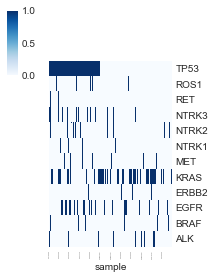

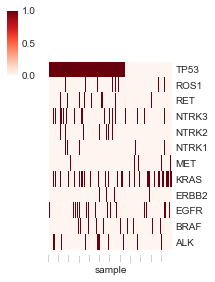

In [141]:
F='./DataProcess/Mutation/嘧啶代谢通路_样本突变_L.txt'
DFT=ReadTable(F)
DFs=DFT.T
fig=sns.clustermap(DFs,figsize=(3,5),linecolor='black',linewidth=0.0,col_cluster=False,row_cluster=False,cmap='Blues')                    
plt.setp(fig.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=90, fontsize=0)
fig.savefig('./DataProcess/Mutation/嘧啶代谢通路_样本突变_L.pdf')
plt.show()  

F='./DataProcess/Mutation/嘧啶代谢通路_样本突变_H.txt'
DFT=ReadTable(F)
DFs=DFT.T
fig=sns.clustermap(DFs,figsize=(3,5),linecolor='black',linewidth=0.0,col_cluster=False,row_cluster=False,cmap='Reds')                    
plt.setp(fig.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=90, fontsize=0)
fig.savefig('./DataProcess/Mutation/嘧啶代谢通路_样本突变_H.pdf')
plt.show()  

# 变异-Fusion

In [41]:
F='./DataProcess/Mutation/data_fusions.txt'
Mut=pd.read_csv(F,sep='\t')


F='./DataProcess/Mutation/HL.txt'
DF1=ReadTable(F)
Dict1 = DF1.to_dict(orient='records')

Mut['嘧啶通路分组'] = Mut['Tumor_Sample_Barcode'].map(Dict1[0])
Mut_sub=Mut[(Mut['嘧啶通路分组']=='H') | (Mut['嘧啶通路分组']=='L')]
len(Mut_sub)
#DF.to_csv('/Users/ceci/省立/先声_临床实验数据/样本整理/合并/TMB_merge_病理号.txt',sep='\t')



2918

In [45]:
Mut_Diver_2=Mut_sub[(Mut_sub['Hugo_Symbol']=='EGFR') | (Mut_sub['Hugo_Symbol']=='ALK') | (Mut_sub['Hugo_Symbol']=='ROS1') | (Mut_sub['Hugo_Symbol']=='BRAF') | (Mut_sub['Hugo_Symbol']=='KRAS')| (Mut_sub['Hugo_Symbol']=='NTRK')| (Mut_sub['Hugo_Symbol']=='NTRK1')| (Mut_sub['Hugo_Symbol']=='NTRK2')| (Mut_sub['Hugo_Symbol']=='NTRK3')| (Mut_sub['Hugo_Symbol']=='MET')| (Mut_sub['Hugo_Symbol']=='ERBB2')| (Mut_sub['Hugo_Symbol']=='RET')| (Mut_sub['Hugo_Symbol']=='TP53')]

for i in list(set(Mut_Diver_2['Hugo_Symbol'])):
    for j in list(set(Mut_Diver_2['嘧啶通路分组'])):
        DF=Mut_Diver_2[Mut_Diver_2['Hugo_Symbol']==i]
        DDF=DF[DF['嘧啶通路分组']==j]
        D=list(set(DDF['Tumor_Sample_Barcode']))
        print (i,j,len(D))
    print (' ')

RET L 1
RET H 0
 
ROS1 L 2
ROS1 H 5
 
MET L 0
MET H 3
 
NTRK2 L 1
NTRK2 H 0
 
ALK L 4
ALK H 1
 
ERBB2 L 1
ERBB2 H 0
 


# 变异-MSI/TMB

In [49]:
F='./DataProcess/Mutation/HL.txt'
DF1=ReadTable(F)
DFT=DF1.T
DFT

F='./DataProcess/Mutation/data_MSI_TMB.txt'
MD=ReadTable(F)

MD=MD.loc[list(DFT.index)]

MD['KEGG_PYRIMIDINE_METABOLISM_Group']=DFT['KEGG_PYRIMIDINE_METABOLISM_Group']
MD.head()

PATIENT_ID ONCOTREE_CODE                 CANCER_TYPE  \
SAMPLE_ID                                                                 
TCGA-38-4631-01  TCGA-38-4631          LUAD  Non-Small Cell Lung Cancer   
TCGA-35-4122-01  TCGA-35-4122          LUAD  Non-Small Cell Lung Cancer   
TCGA-69-8255-01  TCGA-69-8255          LUAD  Non-Small Cell Lung Cancer   
TCGA-38-4625-01  TCGA-38-4625          LUAD  Non-Small Cell Lung Cancer   
TCGA-50-5066-01  TCGA-50-5066          LUAD  Non-Small Cell Lung Cancer   

                CANCER_TYPE_DETAILED  \
SAMPLE_ID                              
TCGA-38-4631-01  Lung Adenocarcinoma   
TCGA-35-4122-01  Lung Adenocarcinoma   
TCGA-69-8255-01  Lung Adenocarcinoma   
TCGA-38-4625-01  Lung Adenocarcinoma   
TCGA-50-5066-01  Lung Adenocarcinoma   

                                                    TUMOR_TYPE  GRADE  \
SAMPLE_ID                                                               
TCGA-38-4631-01                      Lung Adenocarcinoma (NOS)    NaN   
TCGA-35-4122-01                      Lung Adenocarcinoma (NOS)    NaN   
TCGA-69-8255-01  Lung Solid Pattern Predominant Adenocarcinoma    NaN   
TCGA-38-4625-01                      Lung Adenocarcinoma (NOS)    NaN   
TCGA-50-5066-01             Lung Adenocarcinoma, Mixed Subtype    NaN   

                TISSUE_PROSPECTIVE_COLLECTION_INDICATOR  \
SAMPLE_ID                                                 
TCGA-38-4631-01                                      No   
TCGA-35-4122-01                                      No   
TCGA-69-8255-01                                     Yes   
TCGA-38-4625-01                                      No   
TCGA-50-5066-01                                      No   

                TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR TISSUE_SOURCE_SITE  \
SAMPLE_ID                                                                      
TCGA-38-4631-01                                       Yes                 38   
TCGA-35-4122-01                                       Yes                 35   
TCGA-69-8255-01                                        No                 69   
TCGA-38-4625-01                                       Yes                 38   
TCGA-50-5066-01                                       Yes                 50   

                TUMOR_TISSUE_SITE  ANEUPLOIDY_SCORE SAMPLE_TYPE  \
SAMPLE_ID                                                         
TCGA-38-4631-01              Lung              20.0     Primary   
TCGA-35-4122-01              Lung              23.0     Primary   
TCGA-69-8255-01              Lung              20.0     Primary   
TCGA-38-4625-01              Lung              16.0     Primary   
TCGA-50-5066-01              Lung              11.0     Primary   

                 MSI_SCORE_MANTIS  MSI_SENSOR_SCORE SOMATIC_STATUS  \
SAMPLE_ID                                                            
TCGA-38-4631-01            0.3091              0.06        Matched   
TCGA-35-4122-01            0.2776              0.00        Matched   
TCGA-69-8255-01            0.3363              0.17        Matched   
TCGA-38-4625-01            0.2801              0.07        Matched   
TCGA-50-5066-01            0.2919              3.45        Matched   

                 TMB_NONSYNONYMOUS KEGG_PYRIMIDINE_METABOLISM_Group  
SAMPLE_ID                                                            
TCGA-38-4631-01          23.066667                                H  
TCGA-35-4122-01           9.733333                                H  
TCGA-69-8255-01           9.166667                                H  
TCGA-38-4625-01          17.966667                                H  
TCGA-50-5066-01           8.833333                                H

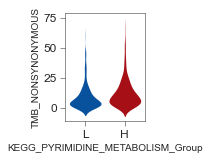

H vs L (p)= 0.0004885664053168647


In [142]:
#单个基因表达：
#FCER1G/IL2RB/ZBTB16////
GeneName='TMB_NONSYNONYMOUS'
GeneDF=MD.copy()

hue='KEGG_PYRIMIDINE_METABOLISM_Group'
XaxisOrder=['L','H']
ColorList=['#08519C','#A50F15']
CellTypeColorsDict={'L':'#08519C','H':'#A50F15'}

ColorDict=CellTypeColorsDict

#Dir='./Figures/'
#GeneExp=GeneDF.T[GeneName].to_frame()
#MetaDFfilter=MetaDF.copy()
#step2:得到对应的MetaDF，by=hue
#hueMataDF=MetaDFfilter[hue].to_frame()

#GenePlotDF = pd.concat([hueMataDF, GeneExp], axis=1, join='inner')

plt.style.use('seaborn-white')
fig1=plt.figure(figsize=(2,3))
ax1=fig1.add_axes([0.3,0.32,0.55,0.5])
sns.violinplot(x=hue,y=GeneName,data=GeneDF,order=XaxisOrder,ax=ax1,linewidth=0.0,palette=(ColorList), width=0.8,inner="box",saturation=1,scale="width")
#sns.boxplot(x=hue,y=GeneName,data=GeneDF,order=XaxisOrder,ax=ax1,palette=(ColorList),linewidth=0.5, width=0.65,saturation=1.0)
ax1.tick_params(axis='x',length=5,width=0.5,labelsize=12,direction='out')
ax1.tick_params(axis='y',length=5,width=0.5,labelsize=12,direction='out')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.5)
ax1.spines['top'].set_linewidth(0.5)

#ax1.set_ylim([-0.5,2])
#fig1.savefig(Dir+'{}.pdf'.format(GeneName))
plt.show()

print ('H vs L (p)=',(scipy.stats.ttest_ind(list(GeneDF[GeneDF['KEGG_PYRIMIDINE_METABOLISM_Group']=='H'][GeneName]),list(GeneDF[GeneDF['KEGG_PYRIMIDINE_METABOLISM_Group']=='L'][GeneName]))[1]))





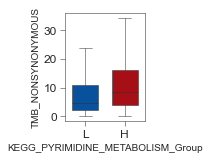

H vs L (p)= 0.0004885664053168647


In [152]:
#单个基因表达：
#FCER1G/IL2RB/ZBTB16////
GeneName='TMB_NONSYNONYMOUS'
GeneDF=MD.copy()

hue='KEGG_PYRIMIDINE_METABOLISM_Group'
XaxisOrder=['L','H']
ColorList=['#08519C','#A50F15']
CellTypeColorsDict={'L':'#08519C','H':'#A50F15'}

ColorDict=CellTypeColorsDict

#Dir='./Figures/'
#GeneExp=GeneDF.T[GeneName].to_frame()
#MetaDFfilter=MetaDF.copy()
#step2:得到对应的MetaDF，by=hue
#hueMataDF=MetaDFfilter[hue].to_frame()

#GenePlotDF = pd.concat([hueMataDF, GeneExp], axis=1, join='inner')

plt.style.use('seaborn-white')
fig1=plt.figure(figsize=(2,3))
ax1=fig1.add_axes([0.3,0.32,0.55,0.5])
#sns.violinplot(x=hue,y=GeneName,data=GeneDF,ax=ax1,order=XaxisOrder,linewidth=0.0,palette=(ColorList), width=0.8,inner="box",saturation=1,scale="width")
sns.boxplot(x=hue,y=GeneName,data=GeneDF,order=XaxisOrder,ax=ax1,palette=(ColorList),linewidth=0.5, width=0.65,saturation=1,showfliers=False)
ax1.tick_params(axis='x',length=5,width=0.5,labelsize=12,direction='out')
ax1.tick_params(axis='y',length=5,width=0.5,labelsize=12,direction='out')
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.5)
ax1.spines['top'].set_linewidth(0.5)

#ax1.set_ylim([-0.5,2])
fig1.savefig('./DataProcess/Mutation/TMB_group.pdf')
plt.show()

print ('H vs L (p)=',(scipy.stats.ttest_ind(list(GeneDF[GeneDF['KEGG_PYRIMIDINE_METABOLISM_Group']=='H'][GeneName]),list(GeneDF[GeneDF['KEGG_PYRIMIDINE_METABOLISM_Group']=='L'][GeneName]))[1]))





In [ ]:
MD

F='./DataProcess/TN_RNAexp_log_data.txt'
RNA=ReadTable(F)
RNAT=RNA.T
RNAT.head()

RNA=RNAT.loc[list(MD.index)]
RNA.head()


In [86]:


#MD['NME1']=RNA['NME1']
#MD['RRM2']=RNA['RRM2']
#MD['TK1']=RNA['TK1']
#MD['POLE2']=RNA['POLE2']
#MD['TYMS']=RNA['TYMS']
#MD['ENTPD8']=RNA['ENTPD8']
#MD.head()

F='./DataProcess/GSEA/KEGG_PYRIMIDINE_METABOLISM.txt'
KEGG=ReadTable(F)
Y=list(set(KEGG.index))

for i in Y:
    MD[i]=RNA[i]
    
MD.head()

PATIENT_ID ONCOTREE_CODE                 CANCER_TYPE  \
SAMPLE_ID                                                                 
TCGA-38-4631-01  TCGA-38-4631          LUAD  Non-Small Cell Lung Cancer   
TCGA-35-4122-01  TCGA-35-4122          LUAD  Non-Small Cell Lung Cancer   
TCGA-69-8255-01  TCGA-69-8255          LUAD  Non-Small Cell Lung Cancer   
TCGA-38-4625-01  TCGA-38-4625          LUAD  Non-Small Cell Lung Cancer   
TCGA-50-5066-01  TCGA-50-5066          LUAD  Non-Small Cell Lung Cancer   

                CANCER_TYPE_DETAILED  \
SAMPLE_ID                              
TCGA-38-4631-01  Lung Adenocarcinoma   
TCGA-35-4122-01  Lung Adenocarcinoma   
TCGA-69-8255-01  Lung Adenocarcinoma   
TCGA-38-4625-01  Lung Adenocarcinoma   
TCGA-50-5066-01  Lung Adenocarcinoma   

                                                    TUMOR_TYPE  GRADE  \
SAMPLE_ID                                                               
TCGA-38-4631-01                      Lung Adenocarcinoma (NOS)    NaN   
TCGA-35-4122-01                      Lung Adenocarcinoma (NOS)    NaN   
TCGA-69-8255-01  Lung Solid Pattern Predominant Adenocarcinoma    NaN   
TCGA-38-4625-01                      Lung Adenocarcinoma (NOS)    NaN   
TCGA-50-5066-01             Lung Adenocarcinoma, Mixed Subtype    NaN   

                TISSUE_PROSPECTIVE_COLLECTION_INDICATOR  \
SAMPLE_ID                                                 
TCGA-38-4631-01                                      No   
TCGA-35-4122-01                                      No   
TCGA-69-8255-01                                     Yes   
TCGA-38-4625-01                                      No   
TCGA-50-5066-01                                      No   

                TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR TISSUE_SOURCE_SITE  \
SAMPLE_ID                                                                      
TCGA-38-4631-01                                       Yes                 38   
TCGA-35-4122-01                                       Yes                 35   
TCGA-69-8255-01                                        No                 69   
TCGA-38-4625-01                                       Yes                 38   
TCGA-50-5066-01                                       Yes                 50   

                TUMOR_TISSUE_SITE  ...     TXNRD2    POLR3D    POLR1B  \
SAMPLE_ID                          ...                                  
TCGA-38-4631-01              Lung  ...  10.279924  8.358625  9.188072   
TCGA-35-4122-01              Lung  ...   7.880643  8.723176  9.258703   
TCGA-69-8255-01              Lung  ...   9.239190  7.919185  9.994551   
TCGA-38-4625-01              Lung  ...   9.042565  8.294023  9.791331   
TCGA-50-5066-01              Lung  ...   9.100423  8.579440  8.729094   

                       DCK     POLR1D      NT5C3        CAD    POLR2J3  \
SAMPLE_ID                                                                
TCGA-38-4631-01  11.232589  11.751071  10.344917   9.804220   9.575747   
TCGA-35-4122-01  11.316706  11.312435   9.753738   8.895960  11.165428   
TCGA-69-8255-01   9.746472  10.679093  10.157941  12.803215   8.654428   
TCGA-38-4625-01   9.698543  10.368856   9.677364  10.681932   8.587909   
TCGA-50-5066-01  10.938602  11.440739   9.556012   9.008252  10.392135   

                      ITPA        AK3  
SAMPLE_ID                              
TCGA-38-4631-01  10.213773   9.830571  
TCGA-35-4122-01  10.318972  10.808530  
TCGA-69-8255-01  10.300261  10.355373  
TCGA-38-4625-01   9.646775  10.420760  
TCGA-50-5066-01  10.841950  11.585573  

[5 rows x 115 columns]

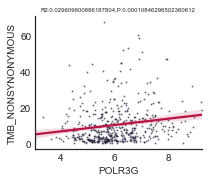

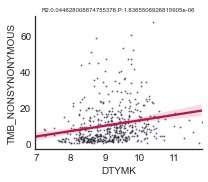

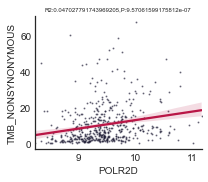

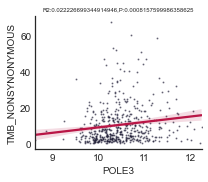

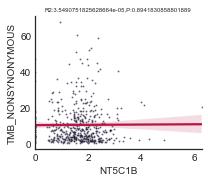

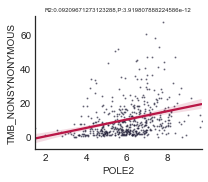

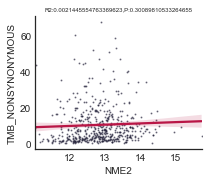

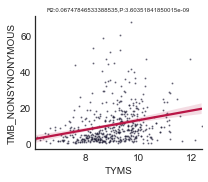

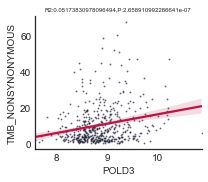

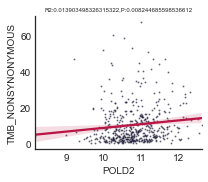

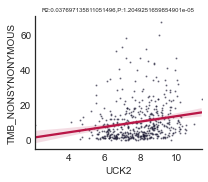

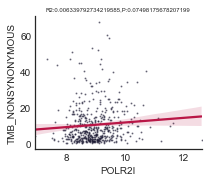

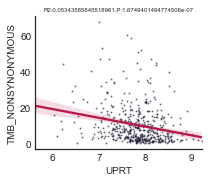

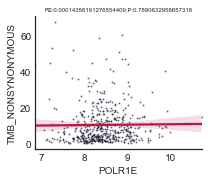

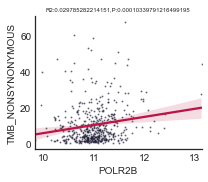

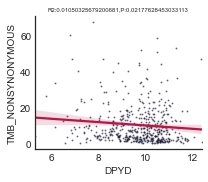

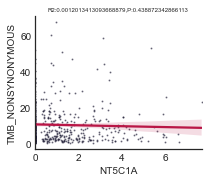

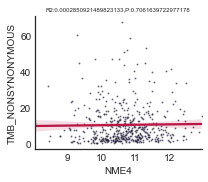

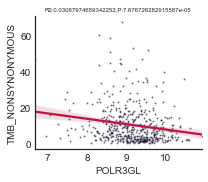

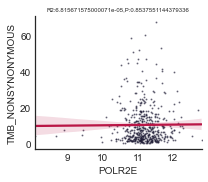

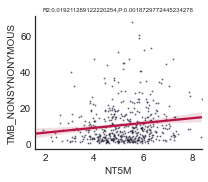

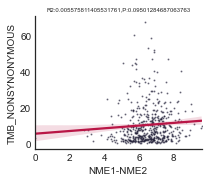

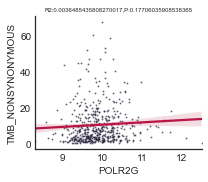

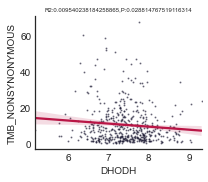

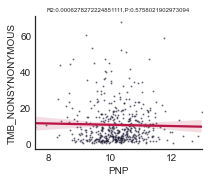

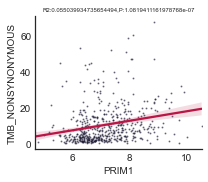

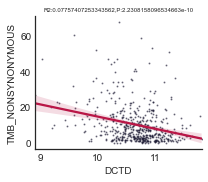

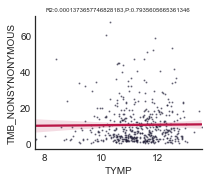

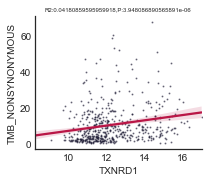

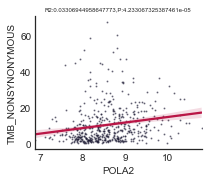

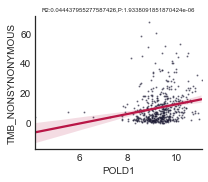

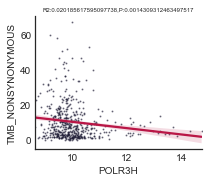

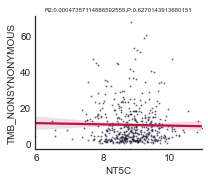

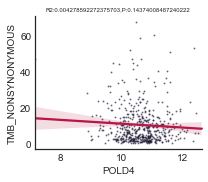

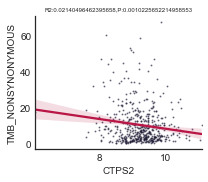

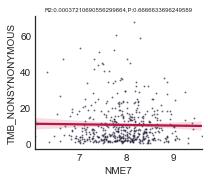

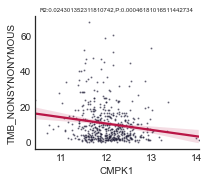

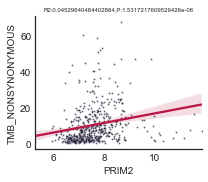

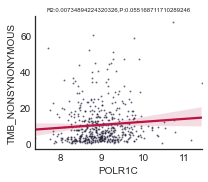

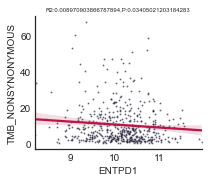

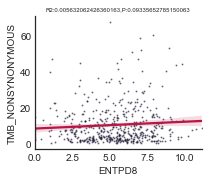

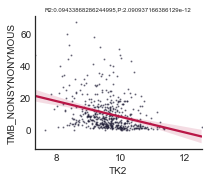

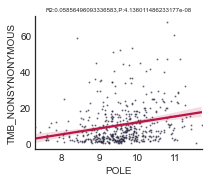

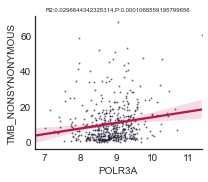

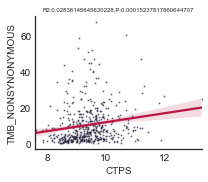

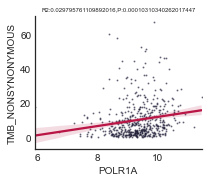

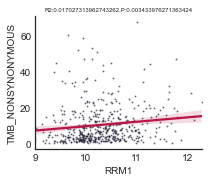

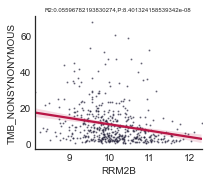

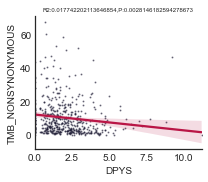

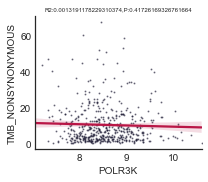

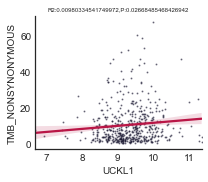

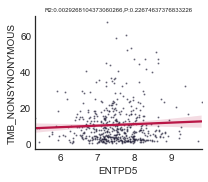

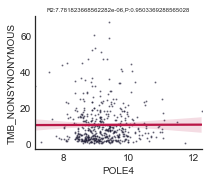

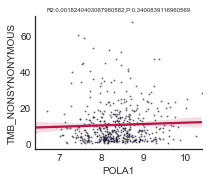

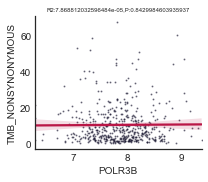

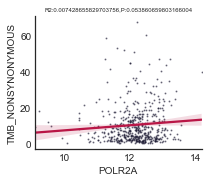

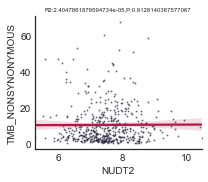

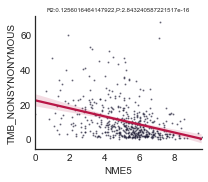

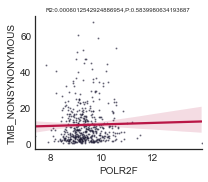

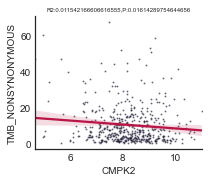

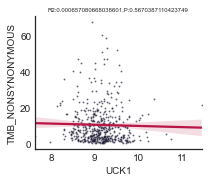

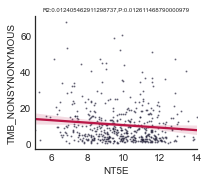

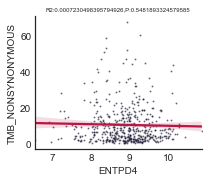

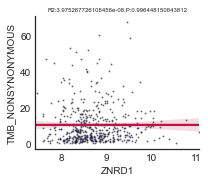

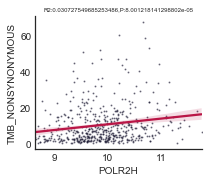

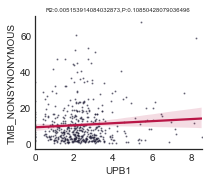

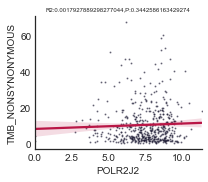

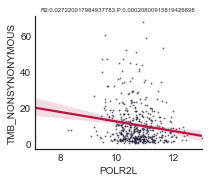

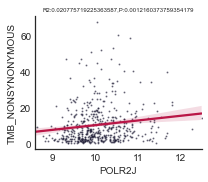

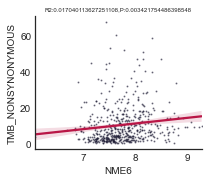

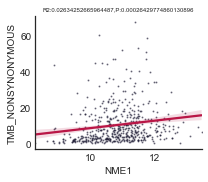

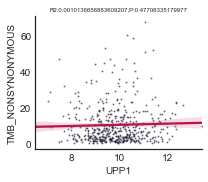

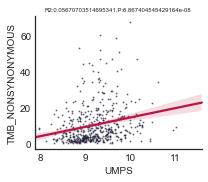

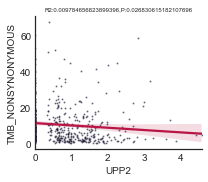

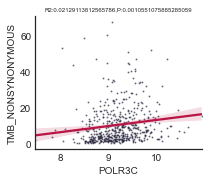

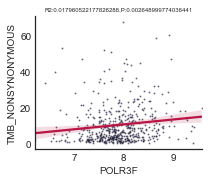

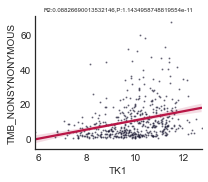

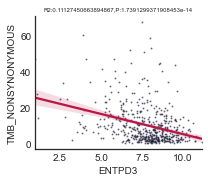

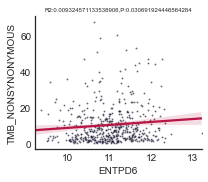

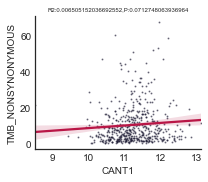

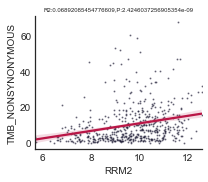

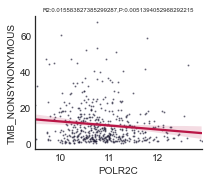

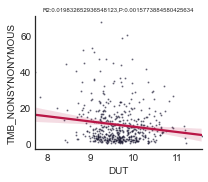

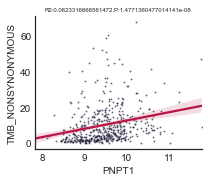

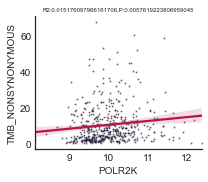

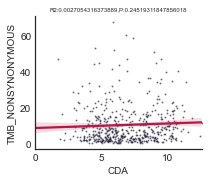

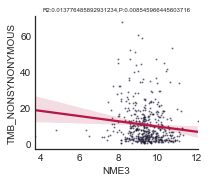

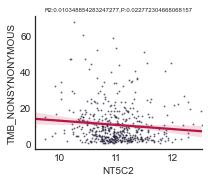

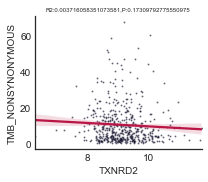

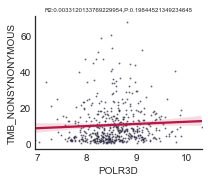

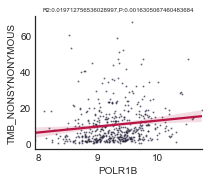

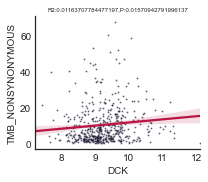

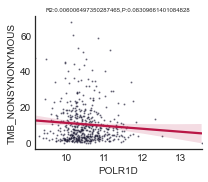

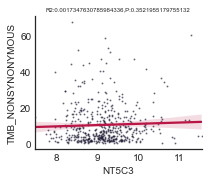

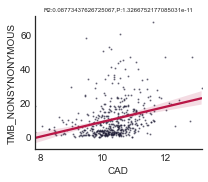

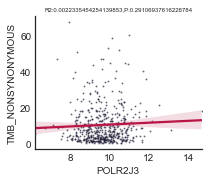

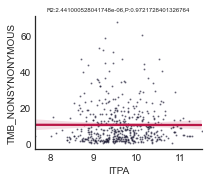

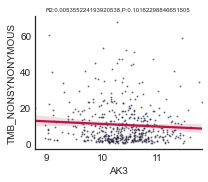

In [87]:
ClusterN='TMB_NONSYNONYMOUS'
#dataF='/Users/huangbeibei/Desktop/RAvsOA_noextend/Batch23/ATACseq/Monocytes/DiffPeaks/mean3_fc2_p0.001_fdr0.1/KmeansCluster/kvalue_k3/RAheterogeneity/clinical/clinical_v1.txt'
Data=MD.copy()
X='{}'.format(ClusterN)
#Y=['ESR','CRP','RF','ACCP','TSS','Reads','TCJ','SCJ','Pain','DAS28_ESR4','DAS28_CRP4','DAS28_ESR3','DAS28_CRP3']
#Y=['CRP']
#Y=['NME1','RRM2','TK1','POLE2','TYMS','ENTPD8']
F='./DataProcess/GSEA/KEGG_PYRIMIDINE_METABOLISM.txt'
KEGG=ReadTable(F)
Y=list(set(KEGG.index))


Data.sort_values(by=[X], inplace=True)
for i in Y:
    import statsmodels.api as sm
    DataN=Data.dropna(axis = 0, subset = [i] )
    
    XX=DataN[X]
    YY=DataN[i]
    XX=sm.add_constant(XX)
    est1 = sm.OLS(YY,XX).fit()
    
    #拟合Y值
    y_fitted = est1.fittedvalues
    #fig, ax = plt.subplots(figsize=(8,6))
    #ax.plot(DataN[X], DataN[i], 'o', label='data')
    #ax.plot(DataN[X], y_fitted, 'r--.',label='OLS')
    #ax.legend(loc='best')
    
    #sns.set_style('ticks')

    #ax=sns.lmplot(x=i, y=X,ci=95,data=Data,height=2.5,aspect=1.2,markers='o',line_kws={'color': '#9145B6'},scatter_kws={"s": 3, "alpha": 1,'color': '#9145B6'})
    ax=sns.lmplot(x=i, y=X,ci=95,data=Data,height=2.5,aspect=1.2,markers='o',line_kws={'color': '#B91646'},scatter_kws={"s": 1, "alpha": 0.5,'color': '#1F1D36'})


    #ax=sns.lmplot(x=X, y=i,ci=95,data=Data,height=2,fit_reg=True,aspect=1.2,markers='o',line_kws={'color': 'black'},scatter_kws={"s": 3, "alpha": 0.55,'color': 'black'})
    plt.title('R2:{},P:{}'.format(est1.rsquared,est1.pvalues[1]), fontsize=6)
    #print (est1.pvalues)
    plt.savefig('./DataProcess/Mutation/TMB/{}_vs_{}.OLS.pdf'.format(ClusterN,i))
    plt.show()

    #print est1.summary()
    #print (est1.rsquared)
    
    


# RRM2与免疫检查点的共表达

In [167]:


TN_RNA_log_T=TN_RNA_log.T
TN_RNA_log_T.head()


GeneSymbol          FAM83A    COL11A1      CST1  AFAP1-AS1    CYP24A1  \
TCGA-05-4244-01  10.853606   7.092112  7.738660  11.476493   8.382252   
TCGA-05-4249-01  11.714512   4.614875  8.437881  11.380109   4.200512   
TCGA-05-4250-01  11.968058  10.593288  4.385120  11.833329   9.943738   
TCGA-05-4382-01   9.585804  12.436214  9.307702   6.899901   8.874422   
TCGA-05-4384-01  10.928578   2.221939  5.280741   7.618283  10.321432   

GeneSymbol           MMP11    ABCA12       CA9      MMP13   PPP1R14D  ...  \
TCGA-05-4244-01   8.851040  8.922320  4.168786   8.488427   7.638595  ...   
TCGA-05-4249-01   9.503279  7.143363  6.978379  10.651527   8.587860  ...   
TCGA-05-4250-01  11.761044  9.605937  9.043052   7.317422  11.202920  ...   
TCGA-05-4382-01  12.639696  7.505216  7.624620   6.555959   5.128508  ...   
TCGA-05-4384-01   8.437769  7.539895  2.055959   8.647897   6.542906  ...   

GeneSymbol          GPM6A      HBA1     FABP4  C13orf36      LGI3     ITLN2  \
TCGA-05-4244-01  5.956229  1.053181  6.851687  2.375401  4.608082  3.174502   
TCGA-05-4249-01  3.498583  2.079293  2.183169  1.702081  4.274373  2.077106   
TCGA-05-4250-01  6.582487  4.809486  4.314755  0.733962  4.385120  1.218099   
TCGA-05-4382-01  0.968791  5.692999  4.733653  0.000000  0.780646  1.284396   
TCGA-05-4384-01  7.000699  8.472922  7.787348  4.128755  8.778064  5.567618   

GeneSymbol            AGER     CLDN18    SLC6A4      SFTPC  
TCGA-05-4244-01  10.066493   8.921282  5.679936  12.383388  
TCGA-05-4249-01   9.812076   8.674535  1.962586  11.239366  
TCGA-05-4250-01   8.143914   8.432646  2.800890  11.753722  
TCGA-05-4382-01   7.074366   1.543199  5.026273   2.803764  
TCGA-05-4384-01  11.579726  11.211396  8.594179  15.437355  

[5 rows x 20513 columns]

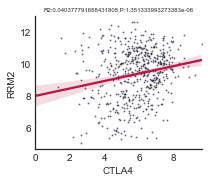

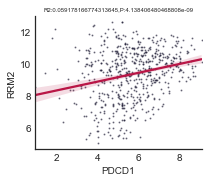

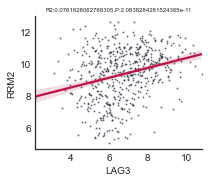

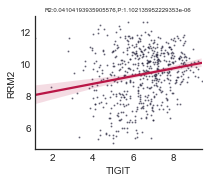

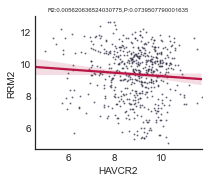

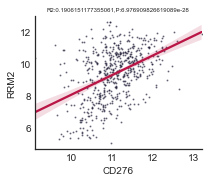

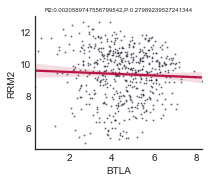

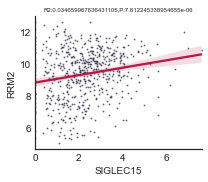

In [177]:
#TN_RNA_log

ClusterN='RRM2'
#dataF='/Users/huangbeibei/Desktop/RAvsOA_noextend/Batch23/ATACseq/Monocytes/DiffPeaks/mean3_fc2_p0.001_fdr0.1/KmeansCluster/kvalue_k3/RAheterogeneity/clinical/clinical_v1.txt'
Data=TN_RNA_log_T.copy()
X='{}'.format(ClusterN)
#Y=['ESR','CRP','RF','ACCP','TSS','Reads','TCJ','SCJ','Pain','DAS28_ESR4','DAS28_CRP4','DAS28_ESR3','DAS28_CRP3']
#Y=['CRP']
Y=['CTLA4','PDCD1','LAG3','TIGIT','HAVCR2','CD276','BTLA','SIGLEC15']


Data.sort_values(by=[X], inplace=True)
for i in Y:
    import statsmodels.api as sm
    DataN=Data.dropna(axis = 0, subset = [i] )
    
    XX=DataN[X]
    YY=DataN[i]
    XX=sm.add_constant(XX)
    est1 = sm.OLS(YY,XX).fit()
    
    #拟合Y值
    y_fitted = est1.fittedvalues
    #fig, ax = plt.subplots(figsize=(8,6))
    #ax.plot(DataN[X], DataN[i], 'o', label='data')
    #ax.plot(DataN[X], y_fitted, 'r--.',label='OLS')
    #ax.legend(loc='best')
    
    #sns.set_style('ticks')

    #ax=sns.lmplot(x=i, y=X,ci=95,data=Data,height=2.5,aspect=1.2,markers='o',line_kws={'color': '#9145B6'},scatter_kws={"s": 3, "alpha": 1,'color': '#9145B6'})
    ax=sns.lmplot(x=i, y=X,ci=95,data=Data,height=2.5,aspect=1.2,markers='o',line_kws={'color': '#B91646'},scatter_kws={"s": 1, "alpha": 0.5,'color': '#1F1D36'})


    #ax=sns.lmplot(x=X, y=i,ci=95,data=Data,height=2,fit_reg=True,aspect=1.2,markers='o',line_kws={'color': 'black'},scatter_kws={"s": 3, "alpha": 0.55,'color': 'black'})
    plt.title('R2:{},P:{}'.format(est1.rsquared,est1.pvalues[1]), fontsize=6)
    #print (est1.pvalues)
    plt.savefig('./DataProcess/CheckPoint/{}_vs_{}.OLS.pdf'.format(ClusterN,i))
    plt.show()

    #print est1.summary()
    #print (est1.rsquared)
    
    


In [187]:
pip install  plotly

     |████████████████████████████████| 26.5 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [188]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=[1, 5, 2, 2, 3],
  theta=['processing cost','mechanical properties','chemical stability', 'thermal stability',
           'device integration'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

In [200]:
from textwrap import wrap

In [201]:
F='./DataProcess/CheckPoint/Spider.txt'
summary_all = ReadTable(F)
summary_all.head()


# Bars are sorted by the cumulative track length
df_sorted = summary_all.sort_values("sum_length", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["sum_length"].values

# Mean gain length
MEAN_GAIN = df_sorted["mean_gain"].values

# Region label
REGION = df_sorted["region"].values

# Number of tracks per region
TRACKS_N = df_sorted["n"].values

In [225]:
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#F3F0D7","#6C5B7B","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=100)

# Normalizer
norm = mpl.colors.Normalize(vmin=0, vmax=20)

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

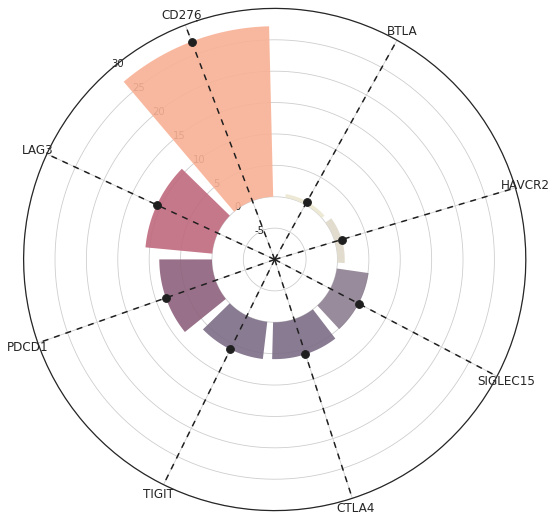

In [234]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-10, 30)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.68, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, -10, 30, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 8, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12);

plt.savefig('./DataProcess/CheckPoint/Spider.pdf')
